In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/xinyuwang/Desktop/ML-Capstone-master/data'

In [6]:
pos_old = pd.read_csv('../data/CMU Data.csv', parse_dates = ['Timestamp'])

In [4]:
pos = pd.read_csv('../data/AssetMngerNet.csv')

## Position Dataset

In [15]:
pos.head()

Date  TFF1LAIN INDEX
0  6/15/2010          263511
1  6/22/2010          276099
2  6/29/2010          258436
3   7/6/2010          256737
4  7/13/2010          280271

In [5]:
y = pos[['Timestamp', 'Positioning']]
lev_y = pos[['Timestamp', 'lev Positioning']]

In [6]:
spx = pos[['Timestamp', 'SPX']]

In [7]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269 entries, 0 to 2268
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        2269 non-null   datetime64[ns]
 1   Libor 1Y         2269 non-null   float64       
 2   JPY              2269 non-null   float64       
 3   EUR              2269 non-null   float64       
 4   SPX              2187 non-null   float64       
 5   VIX              2187 non-null   float64       
 6   1Y OIS           2200 non-null   float64       
 7   Positioning      452 non-null    float64       
 8   lev Positioning  452 non-null    float64       
 9   Signal           1230 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 177.4 KB


### Check NA

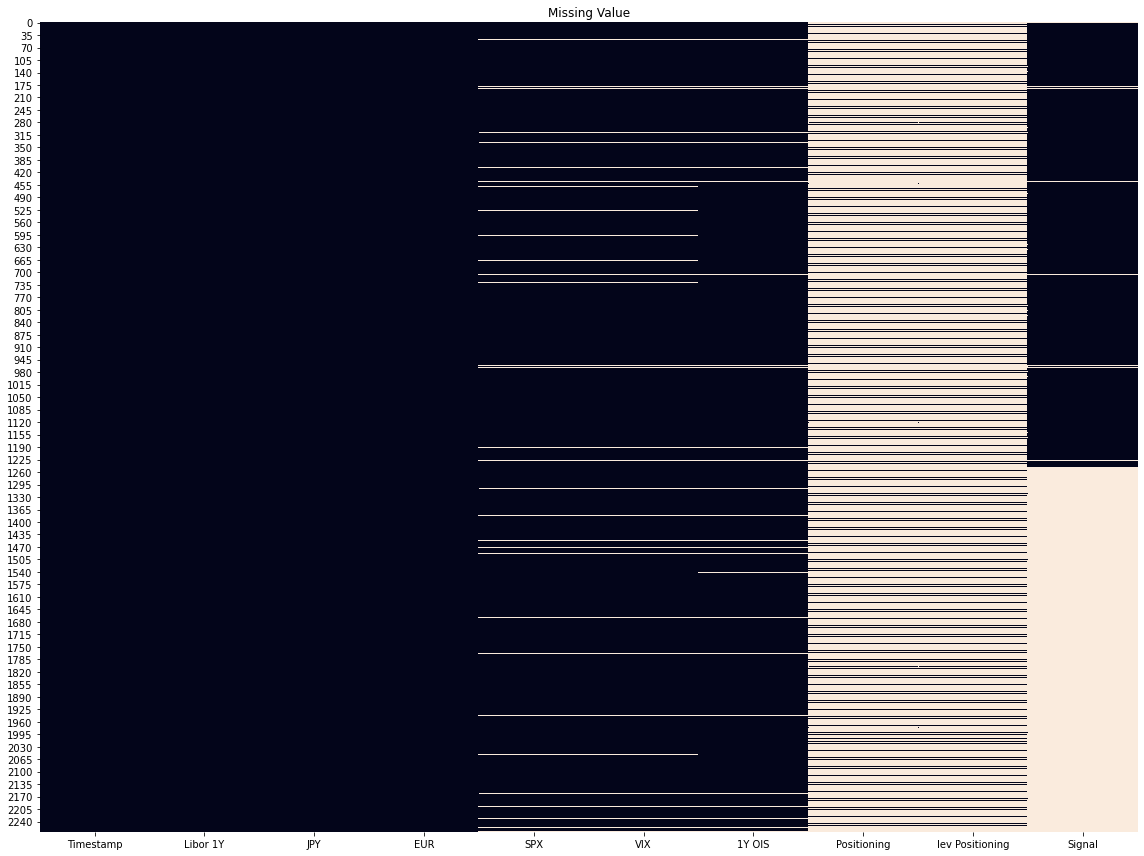

In [8]:
#Missing value plot
plt.figure(figsize=(16,12))
sns.heatmap(pos.isnull(),cbar=False)
#sns.heatmap(df.iloc[np.unique(np.where(df.isnull())[0]),:].isnull(),cbar=False)
plt.title('Missing Value')
plt.tight_layout()
plt.savefig('Missing Value',dpi=300)
plt.show()

In [9]:
pos.head()

Timestamp  Libor 1Y      JPY      EUR      SPX    VIX  1Y OIS  Positioning  \
0 2020-09-10     0.243  0.94165  0.84195  3405.97  28.45   0.055          NaN   
1 2020-09-09     0.243  0.94175  0.84725  3398.96  28.81   0.055          NaN   
2 2020-09-08     0.240  0.94310  0.84915  3331.84  31.46   0.050          NaN   
3 2020-09-07     0.237  0.94105  0.84615      NaN    NaN     NaN          NaN   
4 2020-09-04     0.240  0.94125  0.84465  3426.96  30.75   0.052          NaN   

   lev Positioning        Signal  
0              NaN           NaN  
1              NaN           NaN  
2              NaN           NaN  
3              NaN  5.291036e+08  
4              NaN  1.030498e+09

### Stress Spread

In [10]:
credit_spread = pos['Libor 1Y'] - pos['1Y OIS']
pos['credit_spread'] = credit_spread
credit_spread.describe()

count    2200.000000
mean        0.251427
std         0.091814
min         0.100000
25%         0.174750
50%         0.235500
75%         0.317000
max         0.642000
dtype: float64

In [11]:
credit_spread

0       0.188
1       0.188
2       0.190
3         NaN
4       0.188
        ...  
2264    0.532
2265    0.569
2266    0.572
2267    0.578
2268      NaN
Length: 2269, dtype: float64

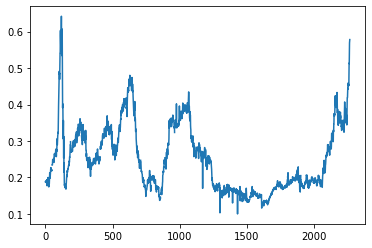

In [12]:
plt.plot(credit_spread[::-1])

In [13]:
np.sum(credit_spread.isnull())

69

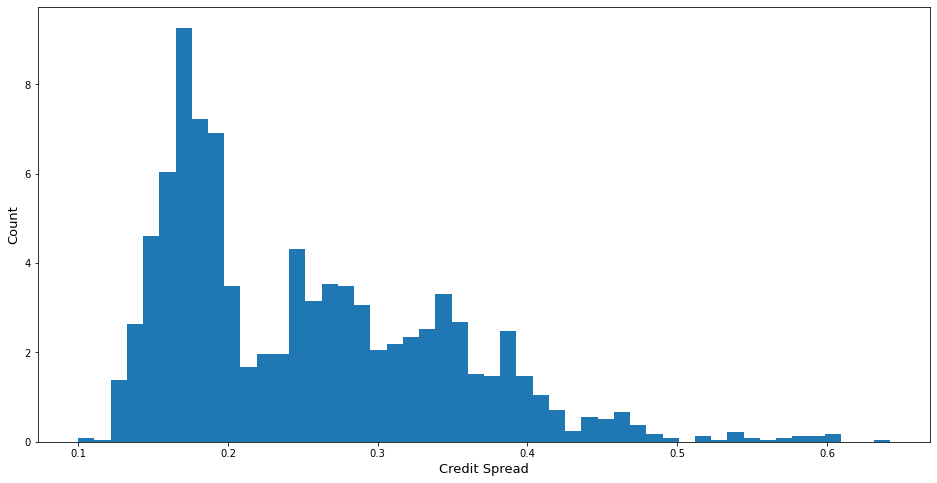

In [14]:
fig = plt.figure(figsize=[16,8])
axs = fig.subplots(1,1)
axs.hist(credit_spread, density = True, bins = 50)
axs.set_ylabel("Count", size = 13)
axs.set_xlabel("Credit Spread", size = 13)
plt.show()

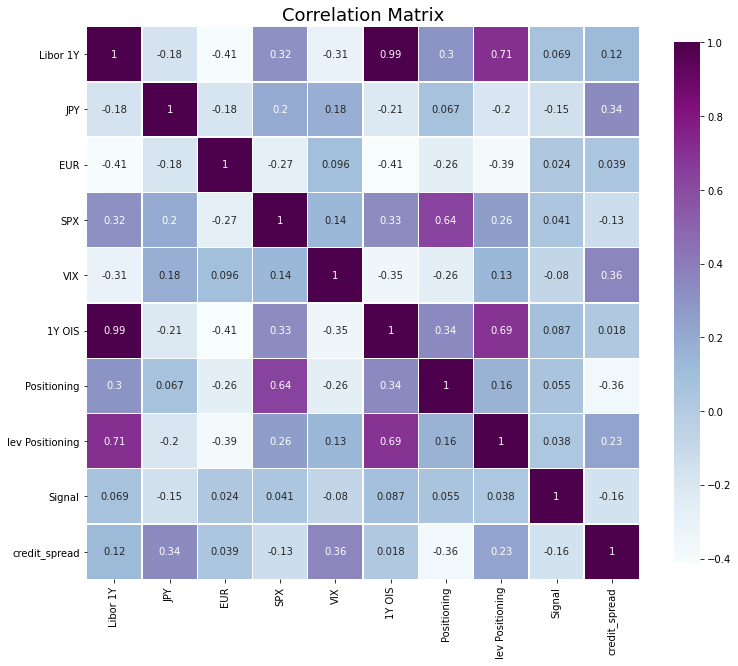

In [15]:
#Correlation
# Compute the correlation matrix
labeled=pos.dropna()
corr = labeled.iloc[:,1:].corr()

#sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 11))
ax = sns.heatmap(corr, square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, cmap="BuPu")
# Draw the heatmap with the mask and correct aspect ratio
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

In [16]:
pos['num_week'] = pos['Timestamp'].apply(lambda x: x.isocalendar()[1])

In [17]:
pos = pos.iloc[::-1].reset_index(drop = True)
pos.head(10)

Timestamp  Libor 1Y      JPY       EUR      SPX    VIX  1Y OIS  \
0 2012-01-02     0.681  1.30055  0.773455      NaN    NaN     NaN   
1 2012-01-03     0.693  1.30395  0.766254  1277.06  22.97  0.1150   
2 2012-01-04     0.684  1.30380  0.772708  1277.30  22.22  0.1120   
3 2012-01-05     0.675  1.29500  0.782442  1281.06  21.48  0.1060   
4 2012-01-06     0.639  1.29885  0.786133  1277.81  20.63  0.1070   
5 2012-01-09     0.612  1.30140  0.783239  1280.70  21.07  0.1000   
6 2012-01-10     0.606  1.30150  0.782932  1292.08  20.69  0.0925   
7 2012-01-11     0.577  1.30055  0.787123  1292.48  21.05  0.0970   
8 2012-01-12     0.546  1.30295  0.779697  1295.50  20.47  0.0940   
9 2012-01-13     0.546  1.30000  0.788799  1289.09  20.91  0.0925   

   Positioning  lev Positioning  Signal  credit_spread  num_week  
0          NaN              NaN     NaN            NaN         1  
1     144716.0         -43317.0     NaN         0.5780         1  
2          NaN              NaN     NaN         0.5720         1  
3          NaN              NaN     NaN         0.5690         1  
4          NaN              NaN     NaN         0.5320         1  
5          NaN              NaN     NaN         0.5120         2  
6     147039.0         -56227.0     NaN         0.5135         2  
7          NaN              NaN     NaN         0.4800         2  
8          NaN              NaN     NaN         0.4520         2  
9          NaN              NaN     NaN         0.4535         2

## SPX_ETF Dataset

In [20]:
spx_etf_flow = pd.read_csv('../data/SPX_ETFFlows.csv', parse_dates = ['Date'])

In [22]:
spx_etf_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2948 entries, 0 to 2947
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2948 non-null   datetime64[ns]
 1   SPY Flows  2948 non-null   float64       
 2   IVV        2947 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 69.2 KB


In [23]:
spx_etf_flow.describe()

SPY Flows          IVV
count   2948.000000  2947.000000
mean       0.236449    35.778398
std     1819.660484   429.420049
min    -8559.760000 -6901.240000
25%    -1000.210000   -26.704050
50%        6.507200     0.000000
75%      934.104000    91.539300
max    12611.300000  6809.120000

### Check NA

In [24]:
spx_etf_flow.isnull().sum()

Date         0
SPY Flows    0
IVV          1
dtype: int64

In [25]:
np.where(spx_etf_flow.isnull())

(array([964]), array([2]))

In [26]:
spx_etf_flow.iloc[960:970,:]

Date  SPY Flows       IVV
960 2012-10-23 -1831.3100    7.0978
961 2012-10-24 -1578.9700  -56.6191
962 2012-10-25   728.2290   21.2961
963 2012-10-26     0.0000  418.5480
964 2012-10-30     0.0000       NaN
965 2012-10-31  -925.7660  149.0040
966 2012-11-01  1528.9200 -638.4860
967 2012-11-02 -1592.4700 -170.5560
968 2012-11-05   -28.3767  -92.5981
969 2012-11-06  1823.1200  -14.3589

### Distribution Plot

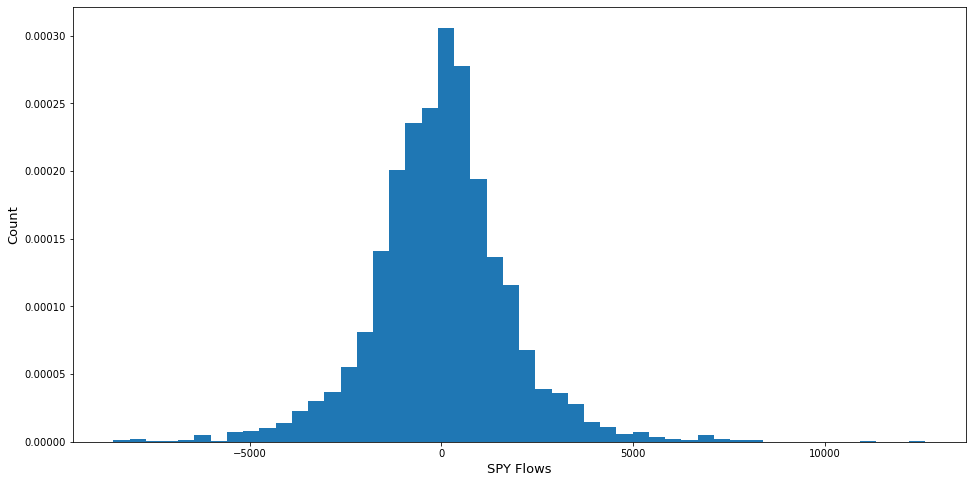

In [68]:
fig = plt.figure(figsize=[16,8])
axs = fig.subplots(1,1)
axs.hist(spx_etf_flow['SPY Flows'], density = True, bins = 50)
axs.set_ylabel("Count", size = 13)
axs.set_xlabel("SPY Flows", size = 13)
plt.show()

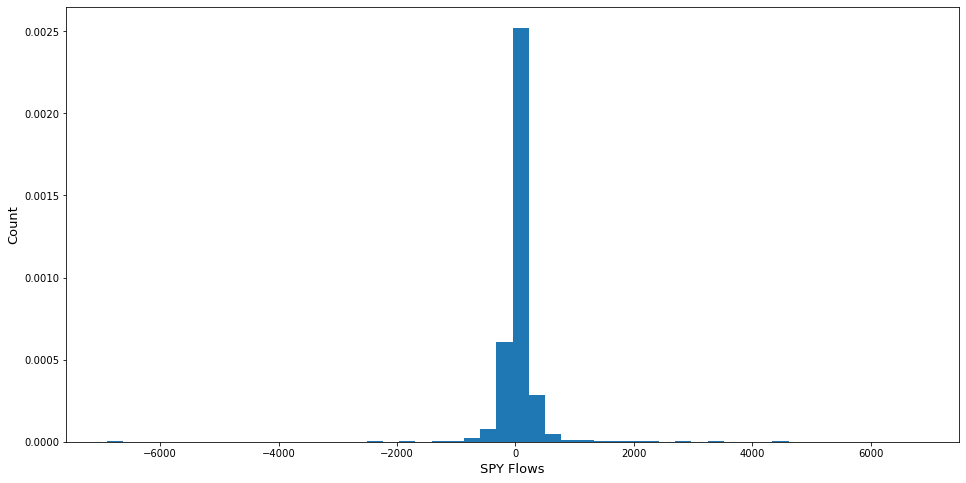

In [69]:
fig = plt.figure(figsize=[16,8])
axs = fig.subplots(1,1)
axs.hist(spx_etf_flow['IVV'], density = True, bins = 50)
axs.set_ylabel("Count", size = 13)
axs.set_xlabel("SPY Flows", size = 13)
plt.show()

### Time Series Plot

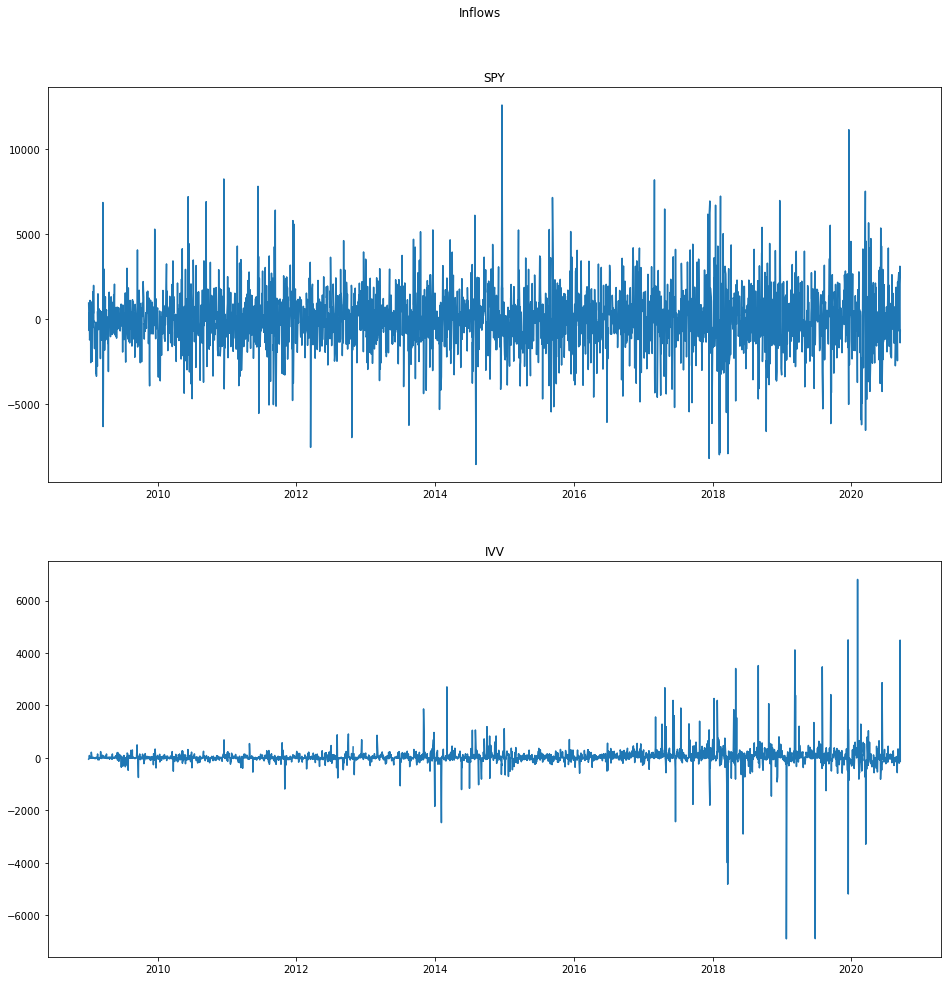

In [27]:
fig = plt.figure(figsize = [16,16])
axs = fig.subplots(2,1)
axs[0].plot(spx_etf_flow.Date, spx_etf_flow['SPY Flows'])
axs[0].set_title("SPY")
axs[1].plot(spx_etf_flow.Date, spx_etf_flow['IVV'])
axs[1].set_title("IVV")
#fig.tight_layout()
fig.suptitle("Inflows",y = 0.95)
plt.show()

### Autocorrelation

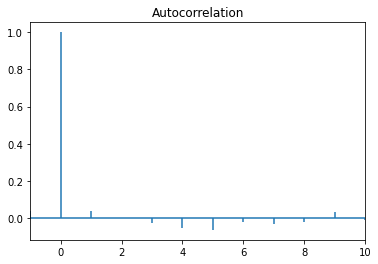

In [28]:
plt.acorr(spx_etf_flow['SPY Flows'])
plt.xlim((-1,10))
plt.title("Autocorrelation")
plt.show()

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(spx_etf_flow['SPY Flows'], lags = 10, return_df = False)

(array([ 3.64482458,  3.64489143,  5.76073943, 13.69593953, 25.82549626,
        27.22710683, 30.4111091 , 32.07071265, 34.93620441, 35.2523644 ]),
 array([5.62437287e-02, 1.61629966e-01, 1.23849081e-01, 8.33147395e-03,
        9.64651538e-05, 1.31286305e-04, 7.98079334e-05, 9.04640480e-05,
        6.11470111e-05, 1.13067340e-04]))

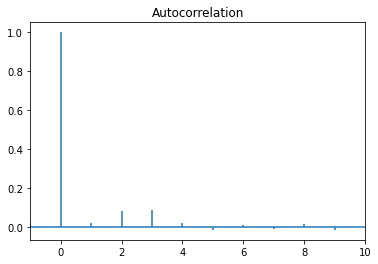

In [30]:
plt.acorr(spx_etf_flow['IVV'].dropna())
plt.xlim((-1,10))
plt.title("Autocorrelation")
plt.show()

In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(spx_etf_flow['IVV'].dropna(), lags = 10, return_df = False)

(array([ 0.83896606, 18.37365096, 38.31684805, 39.26837796, 40.37075948,
        40.41330984, 41.08936552, 41.34629285, 42.5300765 , 42.59471663]),
 array([3.59692646e-01, 1.02379355e-04, 2.42190850e-08, 6.13151047e-08,
        1.25711949e-07, 3.77781108e-07, 7.78231558e-07, 1.79568805e-06,
        2.62869284e-06, 5.87505848e-06]))

### Correlation with y

__Merge the dataset__

In [32]:
spx_spxetf = spx.merge(spx_etf_flow, left_on = 'Timestamp', right_on = 'Date')

In [33]:
spx_spxetf

Timestamp      SPX       Date  SPY Flows       IVV
0    2020-09-10  3405.97 2020-09-10  -701.2430 -201.1620
1    2020-09-09  3398.96 2020-09-09  -679.7330  -17.0630
2    2020-09-08  3331.84 2020-09-08  2731.9000  -33.4500
3    2020-09-04  3426.96 2020-09-04  2090.0200  344.0300
4    2020-09-03  3455.06 2020-09-03   483.6030    0.0000
...         ...      ...        ...        ...       ...
2183 2012-01-09  1280.70 2012-01-09    38.4111  179.8800
2184 2012-01-06  1277.81 2012-01-06 -1954.5900  -25.6385
2185 2012-01-05  1281.06 2012-01-05     6.3999   44.9640
2186 2012-01-04  1277.30 2012-01-04 -1091.4300   70.4531
2187 2012-01-03  1277.06 2012-01-03  1065.4900  249.6870

[2188 rows x 5 columns]

In [34]:
spx_spxetf.drop('Date', inplace = True, axis = 1)

In [35]:
spx_spxetf = spx_spxetf.iloc[::-1].reset_index(drop = True)
spx_spxetf

Timestamp      SPX  SPY Flows       IVV
0    2012-01-03  1277.06  1065.4900  249.6870
1    2012-01-04  1277.30 -1091.4300   70.4531
2    2012-01-05  1281.06     6.3999   44.9640
3    2012-01-06  1277.81 -1954.5900  -25.6385
4    2012-01-09  1280.70    38.4111  179.8800
...         ...      ...        ...       ...
2183 2020-09-03  3455.06   483.6030    0.0000
2184 2020-09-04  3426.96  2090.0200  344.0300
2185 2020-09-08  3331.84  2731.9000  -33.4500
2186 2020-09-09  3398.96  -679.7330  -17.0630
2187 2020-09-10  3405.97  -701.2430 -201.1620

[2188 rows x 4 columns]

In [36]:
spx_spxetf['SPXRet'] = np.log(spx_spxetf.SPX).diff()

In [37]:
spx_spxetf.dropna(inplace = True)
spx_spxetf

Timestamp      SPX  SPY Flows       IVV    SPXRet
1    2012-01-04  1277.30 -1091.4300   70.4531  0.000188
2    2012-01-05  1281.06     6.3999   44.9640  0.002939
3    2012-01-06  1277.81 -1954.5900  -25.6385 -0.002540
4    2012-01-09  1280.70    38.4111  179.8800  0.002259
5    2012-01-10  1292.08  1162.6200   45.3701  0.008847
...         ...      ...        ...       ...       ...
2183 2020-09-03  3455.06   483.6030    0.0000 -0.035758
2184 2020-09-04  3426.96  2090.0200  344.0300 -0.008166
2185 2020-09-08  3331.84  2731.9000  -33.4500 -0.028149
2186 2020-09-09  3398.96  -679.7330  -17.0630  0.019945
2187 2020-09-10  3405.97  -701.2430 -201.1620  0.002060

[2185 rows x 5 columns]

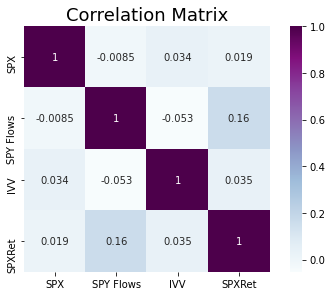

In [38]:
#sns.set_theme(style="white")
f, ax = plt.subplots()
ax = sns.heatmap(spx_spxetf.corr(), square=True,annot=True, cmap="BuPu")
# Draw the heatmap with the mask and correct aspect ratio
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

In [40]:
spxetf_y_daily = spx_spxetf.merge(y, on = "Timestamp")
spxetf_y_daily = spxetf_y_daily.merge(lev_y, on = "Timestamp")

In [41]:
spxetf_y_daily

Timestamp      SPX  SPY Flows       IVV    SPXRet  Positioning  \
0    2012-01-04  1277.30 -1091.4300   70.4531  0.000188          NaN   
1    2012-01-05  1281.06     6.3999   44.9640  0.002939          NaN   
2    2012-01-06  1277.81 -1954.5900  -25.6385 -0.002540          NaN   
3    2012-01-09  1280.70    38.4111  179.8800  0.002259          NaN   
4    2012-01-10  1292.08  1162.6200   45.3701  0.008847     147039.0   
...         ...      ...        ...       ...       ...          ...   
2180 2020-09-03  3455.06   483.6030    0.0000 -0.035758          NaN   
2181 2020-09-04  3426.96  2090.0200  344.0300 -0.008166          NaN   
2182 2020-09-08  3331.84  2731.9000  -33.4500 -0.028149          NaN   
2183 2020-09-09  3398.96  -679.7330  -17.0630  0.019945          NaN   
2184 2020-09-10  3405.97  -701.2430 -201.1620  0.002060          NaN   

      lev Positioning  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4            -56227.0  
...               ...  
2180              NaN  
2181              NaN  
2182              NaN  
2183              NaN  
2184              NaN  

[2185 rows x 7 columns]

__Scatter plot__

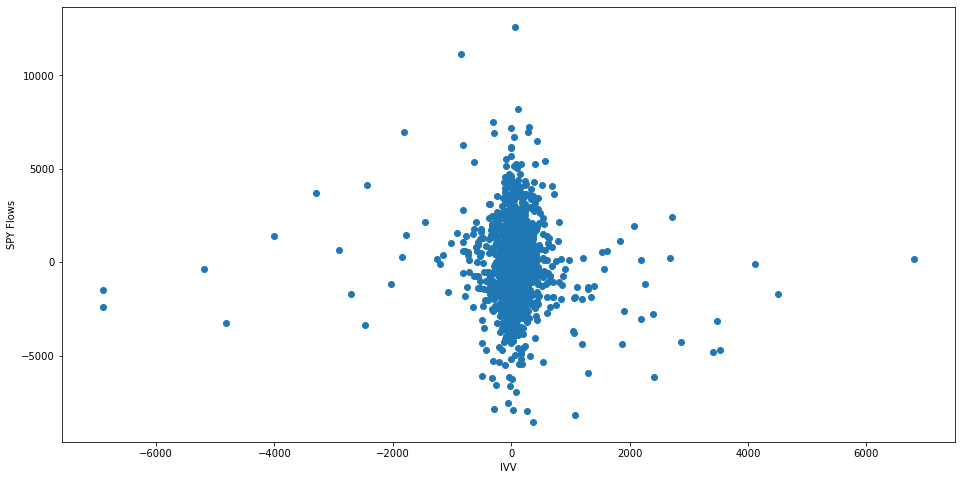

In [71]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,1)
axs.scatter(spxetf_y_daily.IVV, spxetf_y_daily['SPY Flows'])
axs.set_ylabel('SPY Flows')
axs.set_xlabel('IVV')
plt.show()

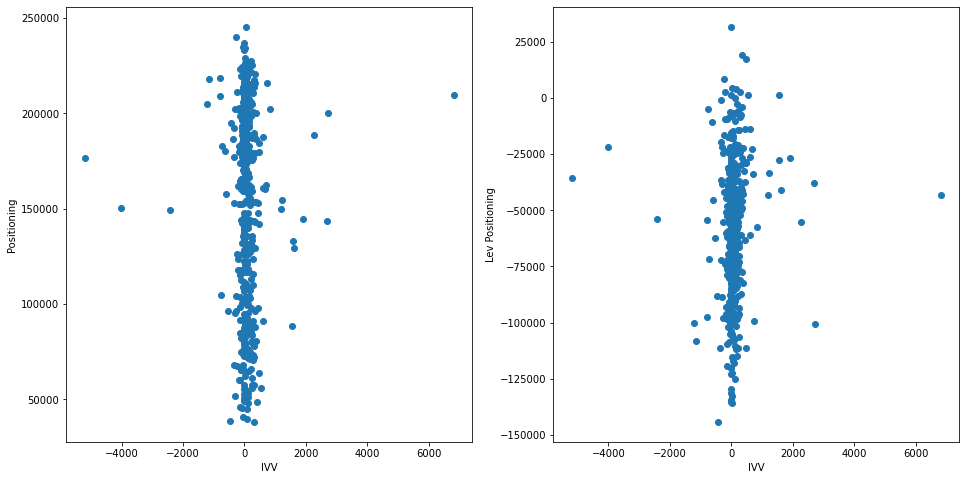

In [62]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_daily.IVV, spxetf_y_daily.Positioning)
axs[1].scatter(spxetf_y_daily.IVV, spxetf_y_daily['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('IVV')
axs[1].set_xlabel('IVV')
plt.show()

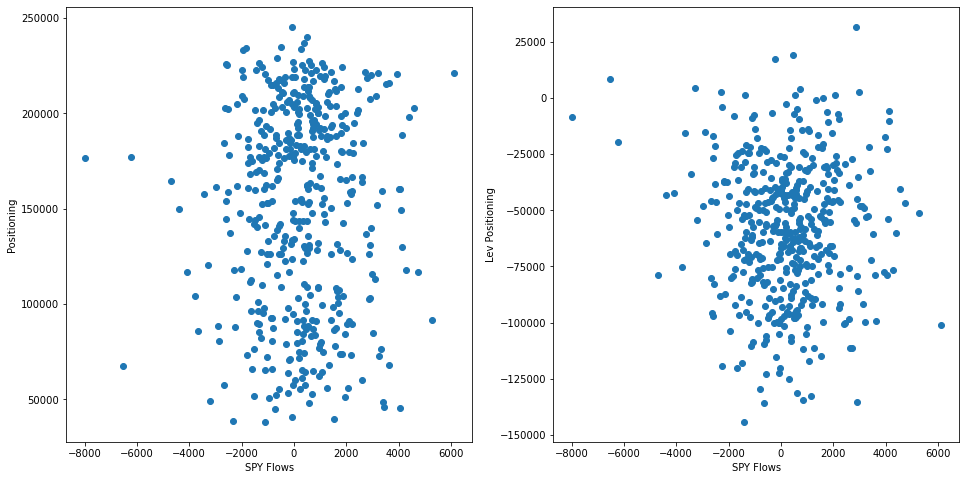

In [64]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_daily['SPY Flows'], spxetf_y_daily.Positioning)
axs[1].scatter(spxetf_y_daily['SPY Flows'], spxetf_y_daily['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('SPY Flows')
axs[1].set_xlabel('SPY Flows')
plt.show()

### Aggregate Data to Weekly

In [43]:
spxetf_y_daily.head(20)

Timestamp      SPX  SPY Flows       IVV    SPXRet  Positioning  \
0  2012-01-04  1277.30 -1091.4300   70.4531  0.000188          NaN   
1  2012-01-05  1281.06     6.3999   44.9640  0.002939          NaN   
2  2012-01-06  1277.81 -1954.5900  -25.6385 -0.002540          NaN   
3  2012-01-09  1280.70    38.4111  179.8800  0.002259          NaN   
4  2012-01-10  1292.08  1162.6200   45.3701  0.008847     147039.0   
5  2012-01-11  1292.48   -38.7683    0.0000  0.000310          NaN   
6  2012-01-12  1295.50  -226.6930  116.9860  0.002334          NaN   
7  2012-01-13  1289.09   560.7000 -161.6790 -0.004960          NaN   
8  2012-01-17  1293.67   536.8240   12.9808  0.003547     160317.0   
9  2012-01-18  1308.04   778.3090  170.6390  0.011047          NaN   
10 2012-01-19  1314.50  1308.0100   85.7415  0.004927          NaN   
11 2012-01-20  1315.38   927.4100  -19.7996  0.000669          NaN   
12 2012-01-23  1316.00  -868.6330    0.0000  0.000471          NaN   
13 2012-01-24  1314.65 -1058.4100  -26.3864 -0.001026     176437.0   
14 2012-01-25  1326.05   523.8440    0.0000  0.008634          NaN   
15 2012-01-26  1318.43  -929.6470    0.0000 -0.005763          NaN   
16 2012-01-27  1316.33  1132.2800  -39.6351 -0.001594          NaN   
17 2012-01-30  1313.01 -1536.6000   59.3034 -0.002525          NaN   
18 2012-01-31  1312.41 -1338.9900  -79.0365 -0.000457     177254.0   
19 2012-02-01  1324.09  -483.4960 -159.5090  0.008860          NaN   

    lev Positioning  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4          -56227.0  
5               NaN  
6               NaN  
7               NaN  
8          -59704.0  
9               NaN  
10              NaN  
11              NaN  
12              NaN  
13         -57525.0  
14              NaN  
15              NaN  
16              NaN  
17              NaN  
18         -59523.0  
19              NaN

In [44]:
picker = spxetf_y_daily.Positioning.notnull()
spxetf_y_weekly = pd.concat([spxetf_y_daily['Timestamp'][picker], spxetf_y_daily[['SPY Flows', 'IVV', 'SPXRet']].cumsum()[picker], spxetf_y_daily[['Positioning', 'lev Positioning']][picker]], axis = 1)

In [45]:
spxetf_y_weekly = pd.concat([spxetf_y_daily.iloc[[0],2:],spxetf_y_weekly])
spxetf_y_weekly = spxetf_y_weekly[['Timestamp','SPY Flows','IVV','SPXRet','Positioning','lev Positioning']] 

In [47]:
daycnt = pd.Series(spxetf_y_weekly.index).diff()
spxetf_y_weekly = spxetf_y_weekly.reset_index(drop = True)
spxetf_y_weekly['daycnt'] = daycnt
spxetf_y_weekly

Timestamp   SPY Flows         IVV    SPXRet  Positioning  \
0          NaT  -1091.4300     70.4531  0.000188          NaN   
1   2012-01-10  -1838.5890    315.0287  0.011693     147039.0   
2   2012-01-17  -1006.5263    283.3165  0.012923     160317.0   
3   2012-01-24     80.1597    493.5110  0.029010     176437.0   
4   2012-01-31  -2068.9533    434.1428  0.027305     177254.0   
..         ...         ...         ...       ...          ...   
447 2020-08-04  18227.9992  98033.5095  0.951177     122424.0   
448 2020-08-11  19499.1027  98470.1615  0.959363     134130.0   
449 2020-08-18  17141.1937  97911.4960  0.976049     135808.0   
450 2020-08-25  15710.5867  97621.5520  0.991807     142723.0   
451 2020-09-01  11267.3757  97041.5580  1.015632     137263.0   

     lev Positioning  daycnt  
0                NaN     NaN  
1           -56227.0     4.0  
2           -59704.0     4.0  
3           -57525.0     5.0  
4           -59523.0     5.0  
..               ...     ...  
447         -67099.0     5.0  
448         -66880.0     5.0  
449         -62915.0     5.0  
450         -66074.0     5.0  
451         -60477.0     5.0  

[452 rows x 7 columns]

In [48]:
spxetf_y_weekly['SPY Flows'] = spxetf_y_weekly['SPY Flows'].diff() #/ spxetf_y_weekly['daycnt']
spxetf_y_weekly['IVV'] = spxetf_y_weekly['IVV'].diff() #/ spxetf_y_weekly['daycnt']
spxetf_y_weekly['SPXRet'] = spxetf_y_weekly['SPXRet'].diff() #/ spxetf_y_weekly['daycnt']
spxetf_y_weekly

Timestamp  SPY Flows       IVV    SPXRet  Positioning  lev Positioning  \
0          NaT        NaN       NaN       NaN          NaN              NaN   
1   2012-01-10  -747.1590  244.5756  0.011505     147039.0         -56227.0   
2   2012-01-17   832.0627  -31.7122  0.001230     160317.0         -59704.0   
3   2012-01-24  1086.6860  210.1945  0.016087     176437.0         -57525.0   
4   2012-01-31 -2149.1130  -59.3682 -0.001705     177254.0         -59523.0   
..         ...        ...       ...       ...          ...              ...   
447 2020-08-04 -1308.4300  -50.5270  0.026996     122424.0         -67099.0   
448 2020-08-11  1271.1035  436.6520  0.008187     134130.0         -66880.0   
449 2020-08-18 -2357.9090 -558.6655  0.016685     135808.0         -62915.0   
450 2020-08-25 -1430.6070 -289.9440  0.015758     142723.0         -66074.0   
451 2020-09-01 -4443.2110 -579.9940  0.023825     137263.0         -60477.0   

     daycnt  
0       NaN  
1       4.0  
2       4.0  
3       5.0  
4       5.0  
..      ...  
447     5.0  
448     5.0  
449     5.0  
450     5.0  
451     5.0  

[452 rows x 7 columns]

In [49]:
spxetf_y_weekly.dropna(inplace = True)
spxetf_y_weekly = spxetf_y_weekly.reset_index(drop = True)
spxetf_y_weekly

Timestamp  SPY Flows       IVV    SPXRet  Positioning  lev Positioning  \
0   2012-01-10  -747.1590  244.5756  0.011505     147039.0         -56227.0   
1   2012-01-17   832.0627  -31.7122  0.001230     160317.0         -59704.0   
2   2012-01-24  1086.6860  210.1945  0.016087     176437.0         -57525.0   
3   2012-01-31 -2149.1130  -59.3682 -0.001705     177254.0         -59523.0   
4   2012-02-07  -809.2950 -247.0442  0.026052     196292.0         -66939.0   
..         ...        ...       ...       ...          ...              ...   
446 2020-08-04 -1308.4300  -50.5270  0.026996     122424.0         -67099.0   
447 2020-08-11  1271.1035  436.6520  0.008187     134130.0         -66880.0   
448 2020-08-18 -2357.9090 -558.6655  0.016685     135808.0         -62915.0   
449 2020-08-25 -1430.6070 -289.9440  0.015758     142723.0         -66074.0   
450 2020-09-01 -4443.2110 -579.9940  0.023825     137263.0         -60477.0   

     daycnt  
0       4.0  
1       4.0  
2       5.0  
3       5.0  
4       5.0  
..      ...  
446     5.0  
447     5.0  
448     5.0  
449     5.0  
450     5.0  

[451 rows x 7 columns]

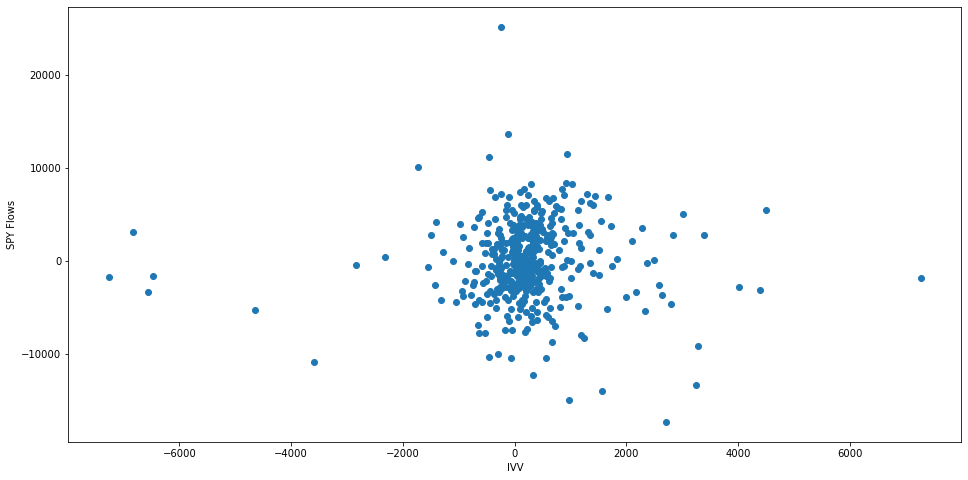

In [72]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,1)
axs.scatter(spxetf_y_weekly.IVV, spxetf_y_weekly['SPY Flows'])
axs.set_ylabel('SPY Flows')
axs.set_xlabel('IVV')
plt.show()

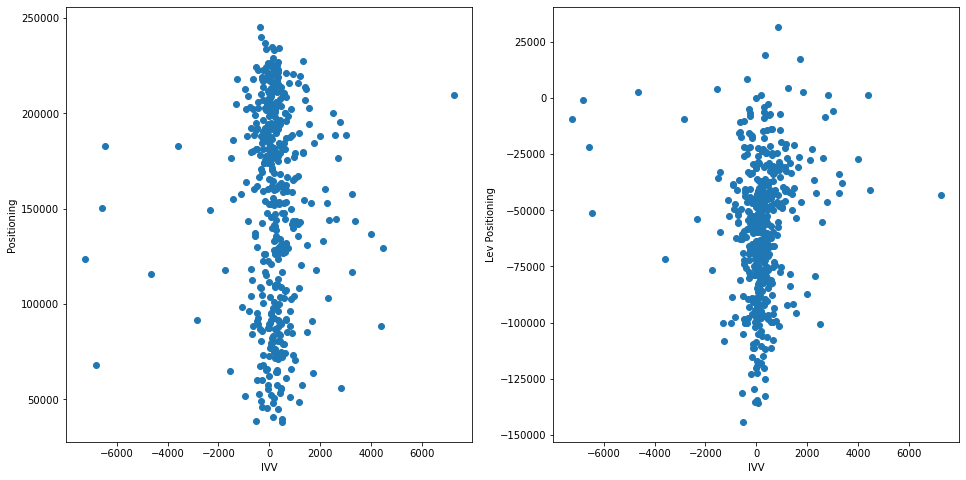

In [65]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_weekly.IVV, spxetf_y_weekly.Positioning)
axs[1].scatter(spxetf_y_weekly.IVV, spxetf_y_weekly['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('IVV')
axs[1].set_xlabel('IVV')
plt.show()

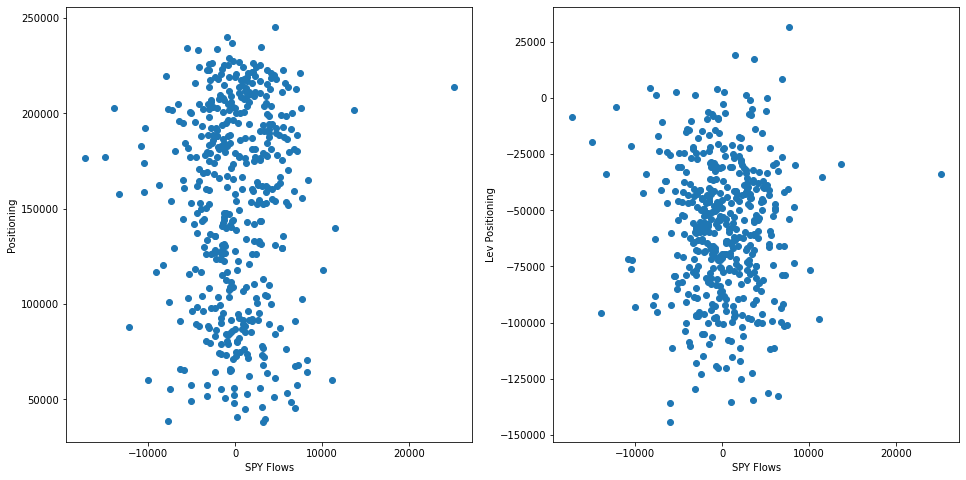

In [66]:
fig = plt.figure(figsize = [16,8])
axs = fig.subplots(1,2)
axs[0].scatter(spxetf_y_weekly['SPY Flows'], spxetf_y_weekly.Positioning)
axs[1].scatter(spxetf_y_weekly['SPY Flows'], spxetf_y_weekly['lev Positioning'])
axs[0].set_ylabel('Positioning')
axs[1].set_ylabel('Lev Positioning')
axs[0].set_xlabel('SPY Flows')
axs[1].set_xlabel('SPY Flows')
plt.show()

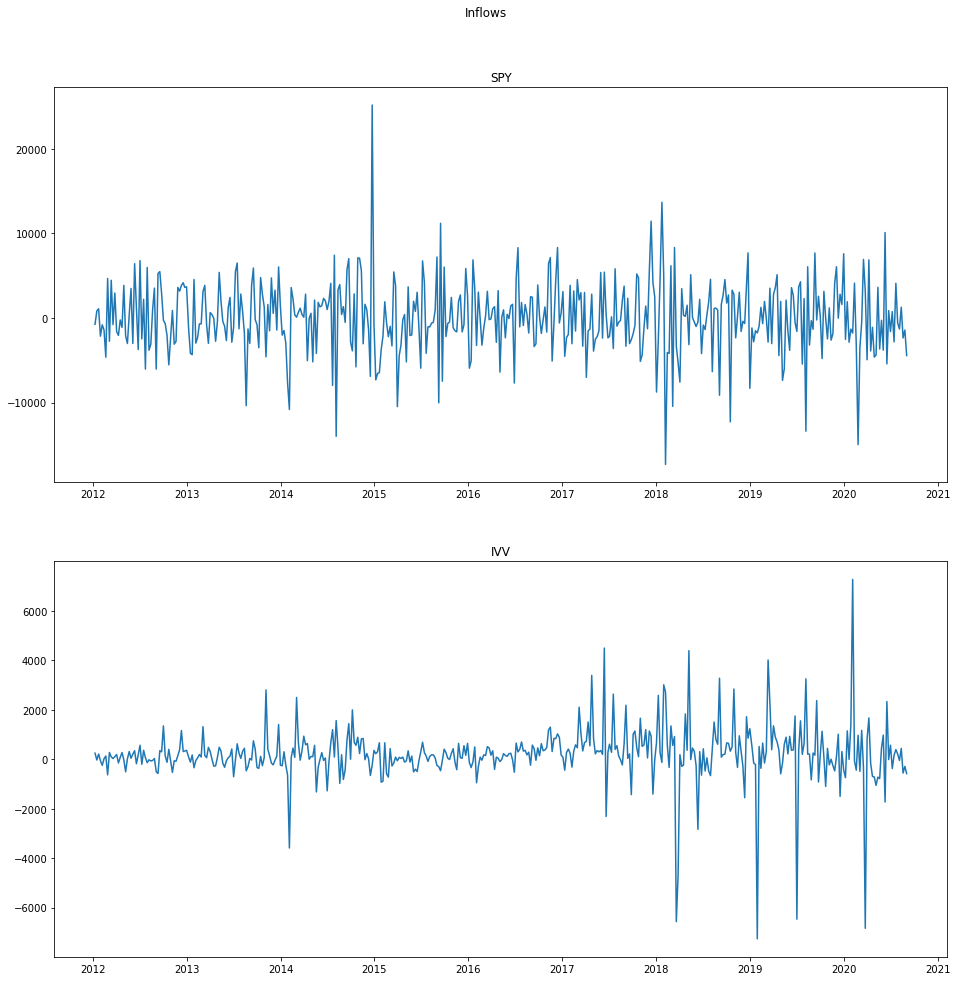

In [51]:
fig = plt.figure(figsize = [16,16])
axs = fig.subplots(2,1)
axs[0].plot(spxetf_y_weekly.Timestamp, spxetf_y_weekly['SPY Flows'])
axs[0].set_title("SPY")
axs[1].plot(spxetf_y_weekly.Timestamp, spxetf_y_weekly['IVV'])
axs[1].set_title("IVV")
#fig.tight_layout()
fig.suptitle("Inflows",y = 0.95)
plt.show()

## Merged Dataset

In [19]:
data = pd.read_csv('train.csv')
data.Time = pd.to_datetime(data.Time)
data = data.iloc[::-1].reset_index(drop = True)

In [20]:
np.isnat(data.Time).sum()

0

In [21]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [22]:
data.head()

Time  Libor 1Y       JPY     EUR      SPX    VIX  1Y OIS  Positioning  \
0 2010-06-02   1.20625  0.010854  1.2249  1098.38  30.17  0.3760          NaN   
1 2010-06-03   1.20500  0.010786  1.2163  1102.83  29.46  0.3740          NaN   
2 2010-06-04   1.19656  0.010881  1.1967  1064.88  35.48  0.3340          NaN   
3 2010-06-07   1.20625  0.010944  1.1923  1050.47  36.57  0.3430          NaN   
4 2010-06-08   1.19656  0.010934  1.1973  1062.00  33.70  0.3415          NaN   

   lev Positioning  Signal  ...  Libor 3 mo  Libor 6 mo  WILL5000INDFC  \
0              NaN     NaN  ...       0.538       0.754          44.21   
1              NaN     NaN  ...       0.538       0.753          44.45   
2              NaN     NaN  ...       0.537       0.749          42.86   
3              NaN     NaN  ...       0.537       0.757          42.20   
4              NaN     NaN  ...       0.537       0.754          42.58   

   NASDAQCOM  VXVCLS  GVZCLS  GOLD_price  DTWEXBGS  SPY Flows       IVV  
0    2281.07   30.59   21.55     1221.00    96.613   1179.950  -60.8453  
1    2303.03   30.24   21.70     1219.75    96.459   -276.814    0.0000  
2    2219.17   34.37   23.15     1203.50    97.163  -2983.430  -80.4515  
3    2173.90   35.30   24.95     1212.40    97.496   -648.819  111.1180  
4    2170.57   33.65   24.98     1248.00    97.336   3680.010   26.7500  

[5 rows x 37 columns]

In [23]:
data.columns

Index(['Time', 'Libor 1Y', 'JPY', 'EUR', 'SPX', 'VIX', '1Y OIS', 'Positioning',
       'lev Positioning', 'Signal', 'TFF1LATL INDEX', 'TFF1LLTL INDEX',
       'TFF1LLTS INDEX', 'TFF1LATS INDEX', 'USDX_Close', 'mktrf', 'umd',
       'JNK_Price', 'JNK_Volume', 'TFF1LAIL INDEX', 'TFF1LLFS INDEX',
       'FedFunds', 'TFF1LAIS INDEX', 'TFF1LLFL INDEX', 'T10Y3M', 'T10Y2Y',
       'T10YIE', 'Libor 3 mo', 'Libor 6 mo', 'WILL5000INDFC', 'NASDAQCOM',
       'VXVCLS', 'GVZCLS', 'GOLD_price', 'DTWEXBGS', 'SPY Flows', 'IVV'],
      dtype='object')

In [24]:
selected = ['Positioning', 'lev Positioning', 'SPX', 'Libor 1Y', '1Y OIS', 'JNK_Price', 'JNK_Volume', 
                         'FedFunds', 'VXVCLS', 'GOLD_price', 'umd', 'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y']
study_data = data.loc[:,['Time']+selected]
study_data['year'] = pd.DatetimeIndex(study_data['Time']).year

### Data Cleaning

In [25]:
study_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 17 columns):
Time               2149 non-null datetime64[ns]
Positioning        428 non-null float64
lev Positioning    428 non-null float64
SPX                2149 non-null float64
Libor 1Y           2149 non-null float64
1Y OIS             2149 non-null float64
JNK_Price          2149 non-null float64
JNK_Volume         2149 non-null float64
FedFunds           2149 non-null float64
VXVCLS             2149 non-null float64
GOLD_price         2149 non-null float64
umd                2149 non-null float64
Libor 3 mo         2149 non-null float64
Libor 6 mo         2149 non-null float64
T10Y3M             2149 non-null float64
T10Y2Y             2149 non-null float64
year               2149 non-null int64
dtypes: datetime64[ns](1), float64(15), int64(1)
memory usage: 285.5 KB


In [26]:
# study_data.loc[study_data['FedFunds'] == '.', 'FedFunds'] = np.nan
# study_data['FedFunds'] = study_data['FedFunds'].astype(float)
# study_data.loc[study_data['VXVCLS'] == '.', 'VXVCLS'] = np.nan
# study_data['VXVCLS'] = study_data['VXVCLS'].astype(float)
# study_data.loc[study_data['GOLD_price'] == '.', 'GOLD_price'] = np.nan
# study_data['GOLD_price'] = study_data['GOLD_price'].astype(float)
# study_data.loc[study_data['Libor 3 mo'] == '.', 'Libor 3 mo'] = np.nan
# study_data['Libor 3 mo'] = study_data['Libor 3 mo'].astype(float)
# study_data.loc[study_data['Libor 6 mo'] == '.', 'Libor 6 mo'] = np.nan
# study_data['Libor 6 mo'] = study_data['Libor 6 mo'].astype(float)

In [27]:
study_data.describe()

Positioning  lev Positioning          SPX     Libor 1Y       1Y OIS  \
count     428.000000       428.000000  2149.000000  2149.000000  2149.000000   
mean   173804.941589    -70326.878505  1855.202741     1.128175     0.516139   
std     66572.394782     31907.263359   485.302859     0.589207     0.583750   
min     38139.000000   -152783.000000  1022.580000     0.533500     0.064000   
25%    129020.000000    -94168.250000  1377.510000     0.720000     0.142000   
50%    183311.500000    -69511.000000  1913.850000     0.875940     0.228000   
75%    214706.750000    -46939.250000  2139.180000     1.475100     0.564000   
max    307770.000000     18947.000000  2896.740000     2.832130     2.372000   

         JNK_Price    JNK_Volume     FedFunds       VXVCLS   GOLD_price  \
count  2149.000000  2.149000e+03  2149.000000  2149.000000  2149.000000   
mean     81.077086  2.429781e+06     0.385054    18.600991  1357.229688   
std       9.780062  1.817134e+06     0.484358     5.177641   186.141303   
min      57.537243  2.571000e+05     0.040000    11.850000  1050.600000   
25%      73.337799  1.159200e+06     0.090000    14.990000  1229.500000   
50%      82.517632  1.914900e+06     0.150000    17.240000  1296.500000   
75%      87.534248  3.226800e+06     0.400000    20.550000  1454.000000   
max      96.804054  2.119080e+07     1.920000    43.380000  1896.500000   

               umd   Libor 3 mo   Libor 6 mo       T10Y3M       T10Y2Y  \
count  2149.000000  2149.000000  2149.000000  2149.000000  2149.000000   
mean      0.000165     0.635549     0.827556     2.005091     1.581819   
std       0.006755     0.566936     0.586480     0.635477     0.652267   
min      -0.031500     0.223000     0.319000     0.730000     0.180000   
25%      -0.003400     0.273000     0.414000     1.510000     1.050000   
50%       0.000500     0.340000     0.550000     1.960000     1.530000   
75%       0.004000     0.788000     1.158000     2.490000     2.130000   
max       0.036300     2.369000     2.534000     3.600000     2.910000   

              year  
count  2149.000000  
mean   2014.033504  
std       2.409593  
min    2010.000000  
25%    2012.000000  
50%    2014.000000  
75%    2016.000000  
max    2018.000000

In [28]:
study_data['SPX'] = np.log(study_data['SPX']).diff()
study_data['JNK_Price'] = np.log(study_data['JNK_Price']).diff()
study_data['GOLD_price'] = np.log(study_data['GOLD_price']).diff()

In [29]:
selected1 = ['Positioning', 'lev Positioning', 'SPX', 'JNK_Price', 'GOLD_price','year']
study_data_return = study_data.loc[:,['Time']+selected1]
study_data_return['SPX'] = study_data_return['SPX'].shift(1)
study_data_return['JNK_Price'] = study_data_return['JNK_Price'].shift(1)
study_data_return['GOLD_price'] = study_data_return['GOLD_price'].shift(1)
study_data_return

Time  Positioning  lev Positioning       SPX  JNK_Price  \
0    2010-06-02          NaN              NaN       NaN        NaN   
1    2010-06-03          NaN              NaN       NaN        NaN   
2    2010-06-04          NaN              NaN  0.004043  -0.000536   
3    2010-06-07          NaN              NaN -0.035017  -0.004293   
4    2010-06-08          NaN              NaN -0.013624  -0.006203   
...         ...          ...              ...       ...        ...   
2144 2018-08-21      88508.0         -30803.0  0.002425   0.000836   
2145 2018-08-22          NaN              NaN  0.002066   0.001948   
2146 2018-08-23          NaN              NaN -0.000398   0.000278   
2147 2018-08-24          NaN              NaN -0.001693  -0.000556   
2148 2018-08-27          NaN              NaN  0.006180   0.001668   

      GOLD_price  year  
0            NaN  2010  
1            NaN  2010  
2      -0.001024  2010  
3      -0.013412  2010  
4       0.007368  2010  
...          ...   ...  
2144    0.010188  2018  
2145    0.004490  2018  
2146    0.002300  2018  
2147   -0.008011  2018  
2148    0.002229  2018  

[2149 rows x 7 columns]

In [30]:
study_data['year'].nunique()

9

In [31]:
study_data.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

### Daily Plots

In [32]:
study_data.columns

Index(['Time', 'Positioning', 'lev Positioning', 'SPX', 'Libor 1Y', '1Y OIS',
       'JNK_Price', 'JNK_Volume', 'FedFunds', 'VXVCLS', 'GOLD_price', 'umd',
       'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y', 'year'],
      dtype='object')

In [33]:
study_data_return.columns

Index(['Time', 'Positioning', 'lev Positioning', 'SPX', 'JNK_Price',
       'GOLD_price', 'year'],
      dtype='object')

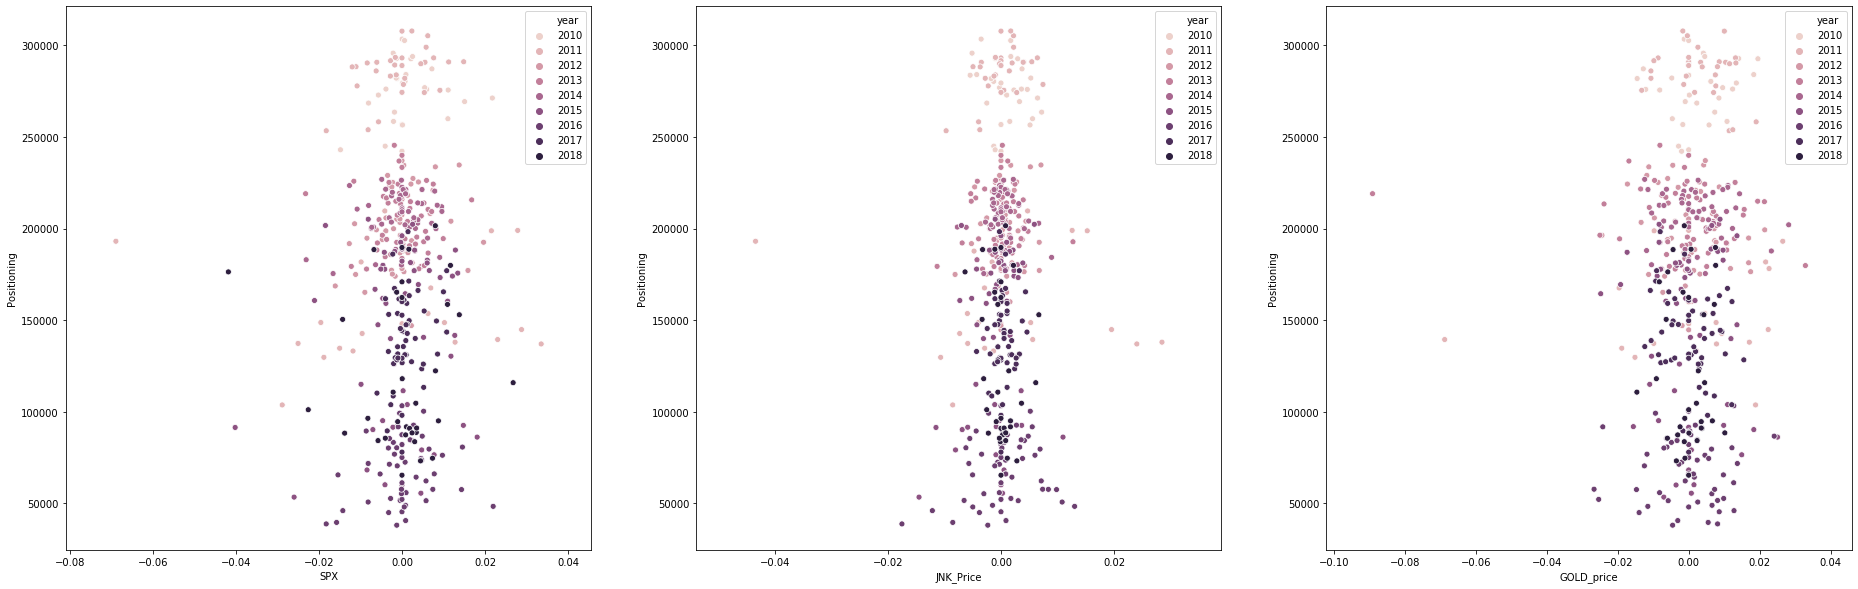

In [57]:
fig = plt.figure(figsize = (32,10))
axs = fig.subplots(1,3)
for i in range(3):
    sns.scatterplot(study_data_return.iloc[:,3+i], study_data_return.iloc[:,1], data=study_data_return, hue="year", legend="full",ax=axs[i%3])
    axs[i%3].set_ylabel(study_data_return.columns[1])
    axs[i%3].set_xlabel(study_data_return.columns[i+3])

In [35]:
selected2 = ['Positioning', 'lev Positioning', 'Libor 1Y', '1Y OIS', 'JNK_Volume', 
                         'FedFunds', 'VXVCLS', 'umd', 'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y','year']
study_data_left = study_data.loc[:,['Time']+selected2]

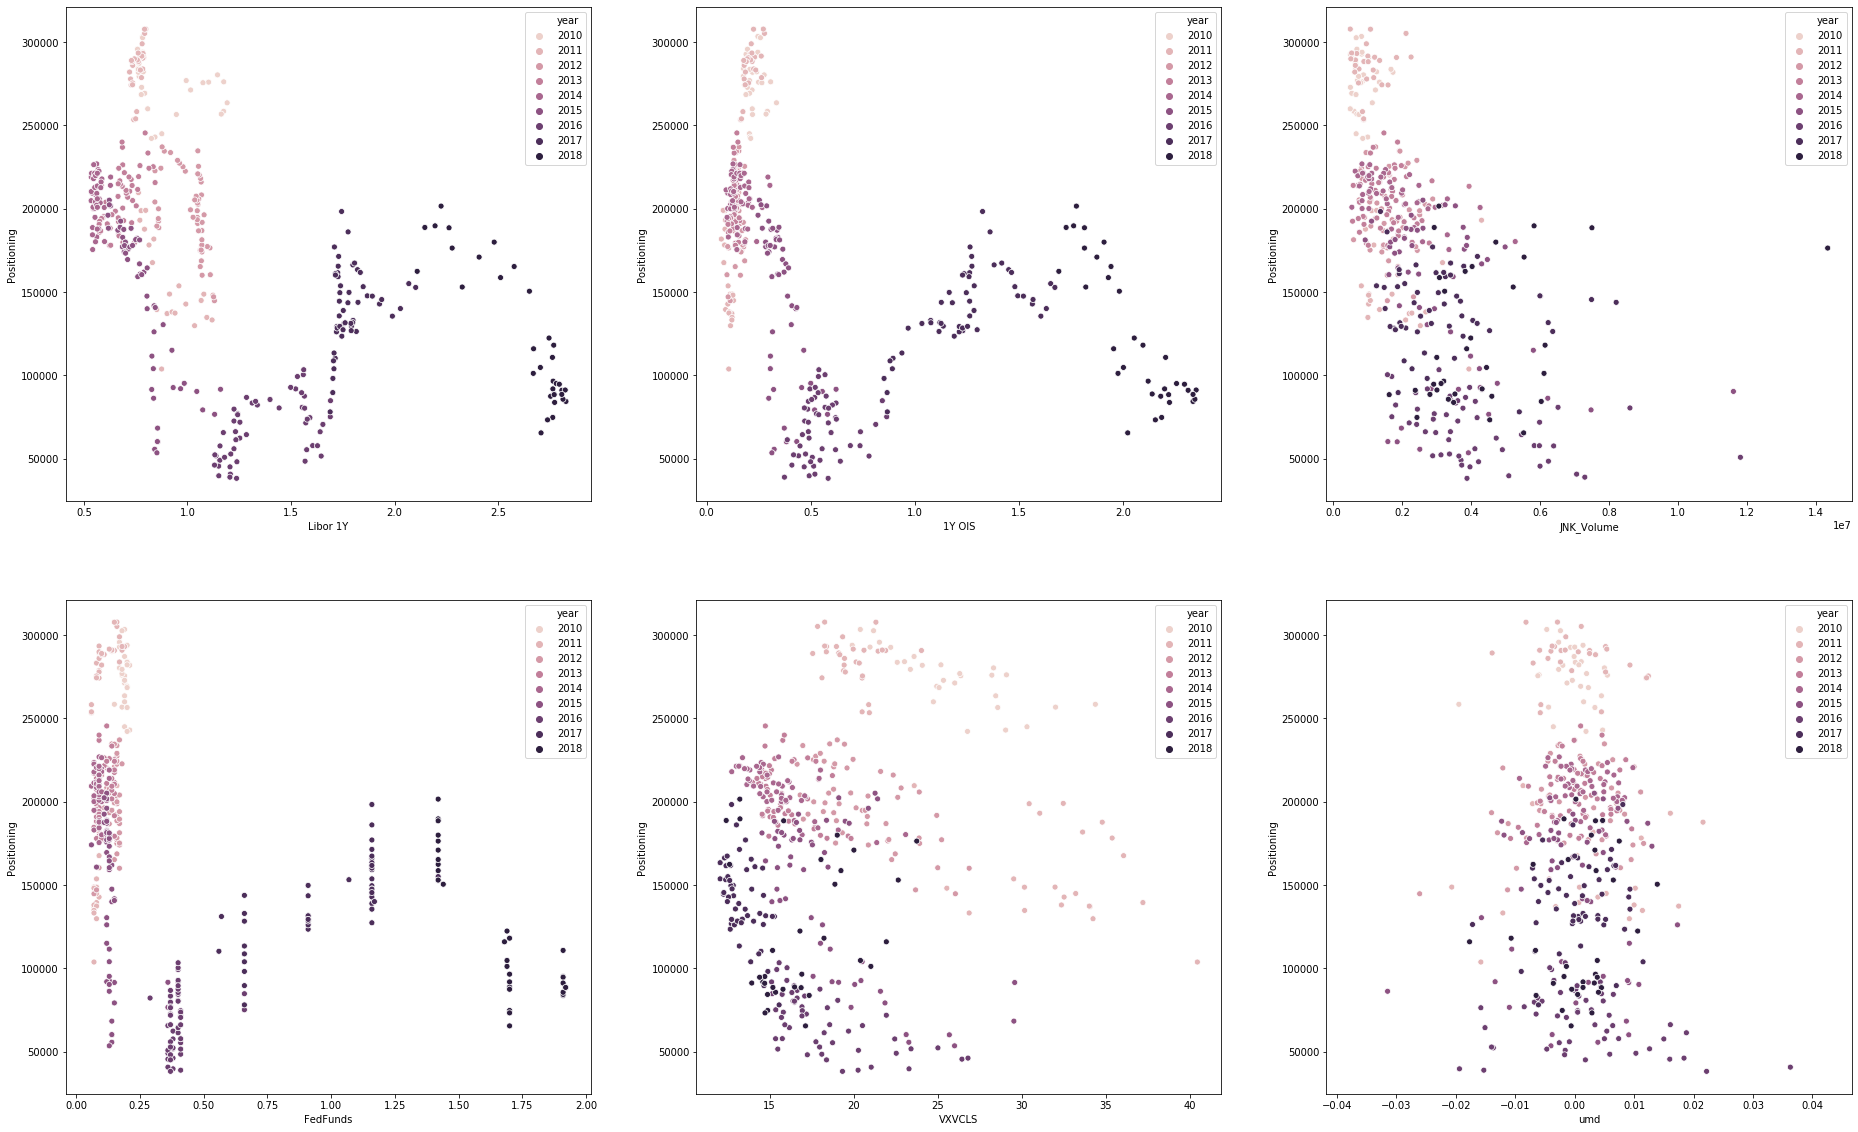

In [58]:
fig = plt.figure(figsize = (32,20))
axs = fig.subplots(2,3)
for i in range(6):
    sns.scatterplot(study_data_left.iloc[:,3+i], study_data_left.iloc[:,1], data=study_data_left, hue="year",legend="full", ax=axs[i//3,i%3])
    axs[i//3, i%3].set_ylabel(study_data_left.columns[1])
    axs[i//3, i%3].set_xlabel(study_data_left.columns[i+3])

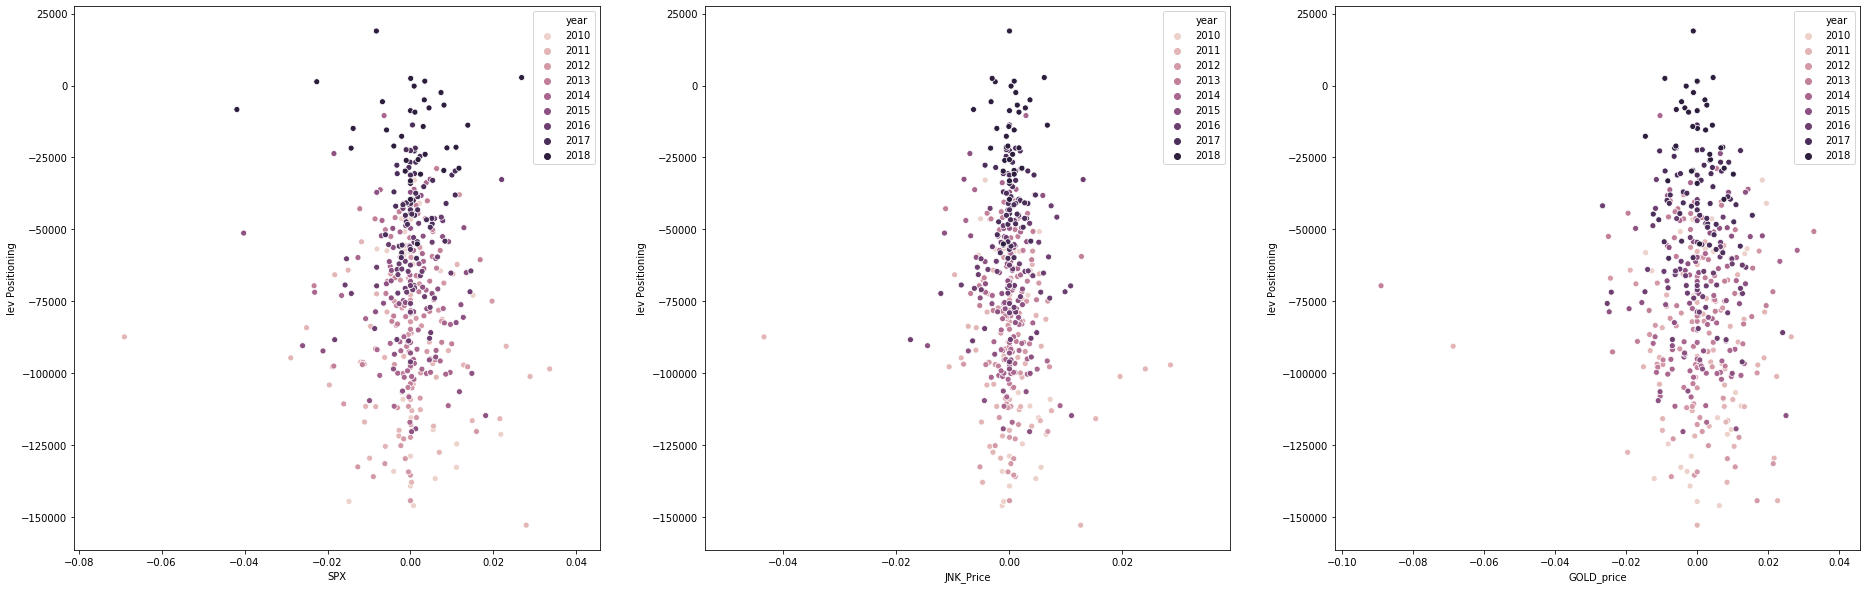

In [59]:
fig = plt.figure(figsize = (32,10))
axs = fig.subplots(1,3)
for i in range(3):
    sns.scatterplot(study_data_return.iloc[:,3+i], study_data_return.iloc[:,2], data=study_data_return, hue="year",legend="full", ax=axs[i%3])
    axs[i%3].set_ylabel(study_data_return.columns[2])
    axs[i%3].set_xlabel(study_data_return.columns[i+3])

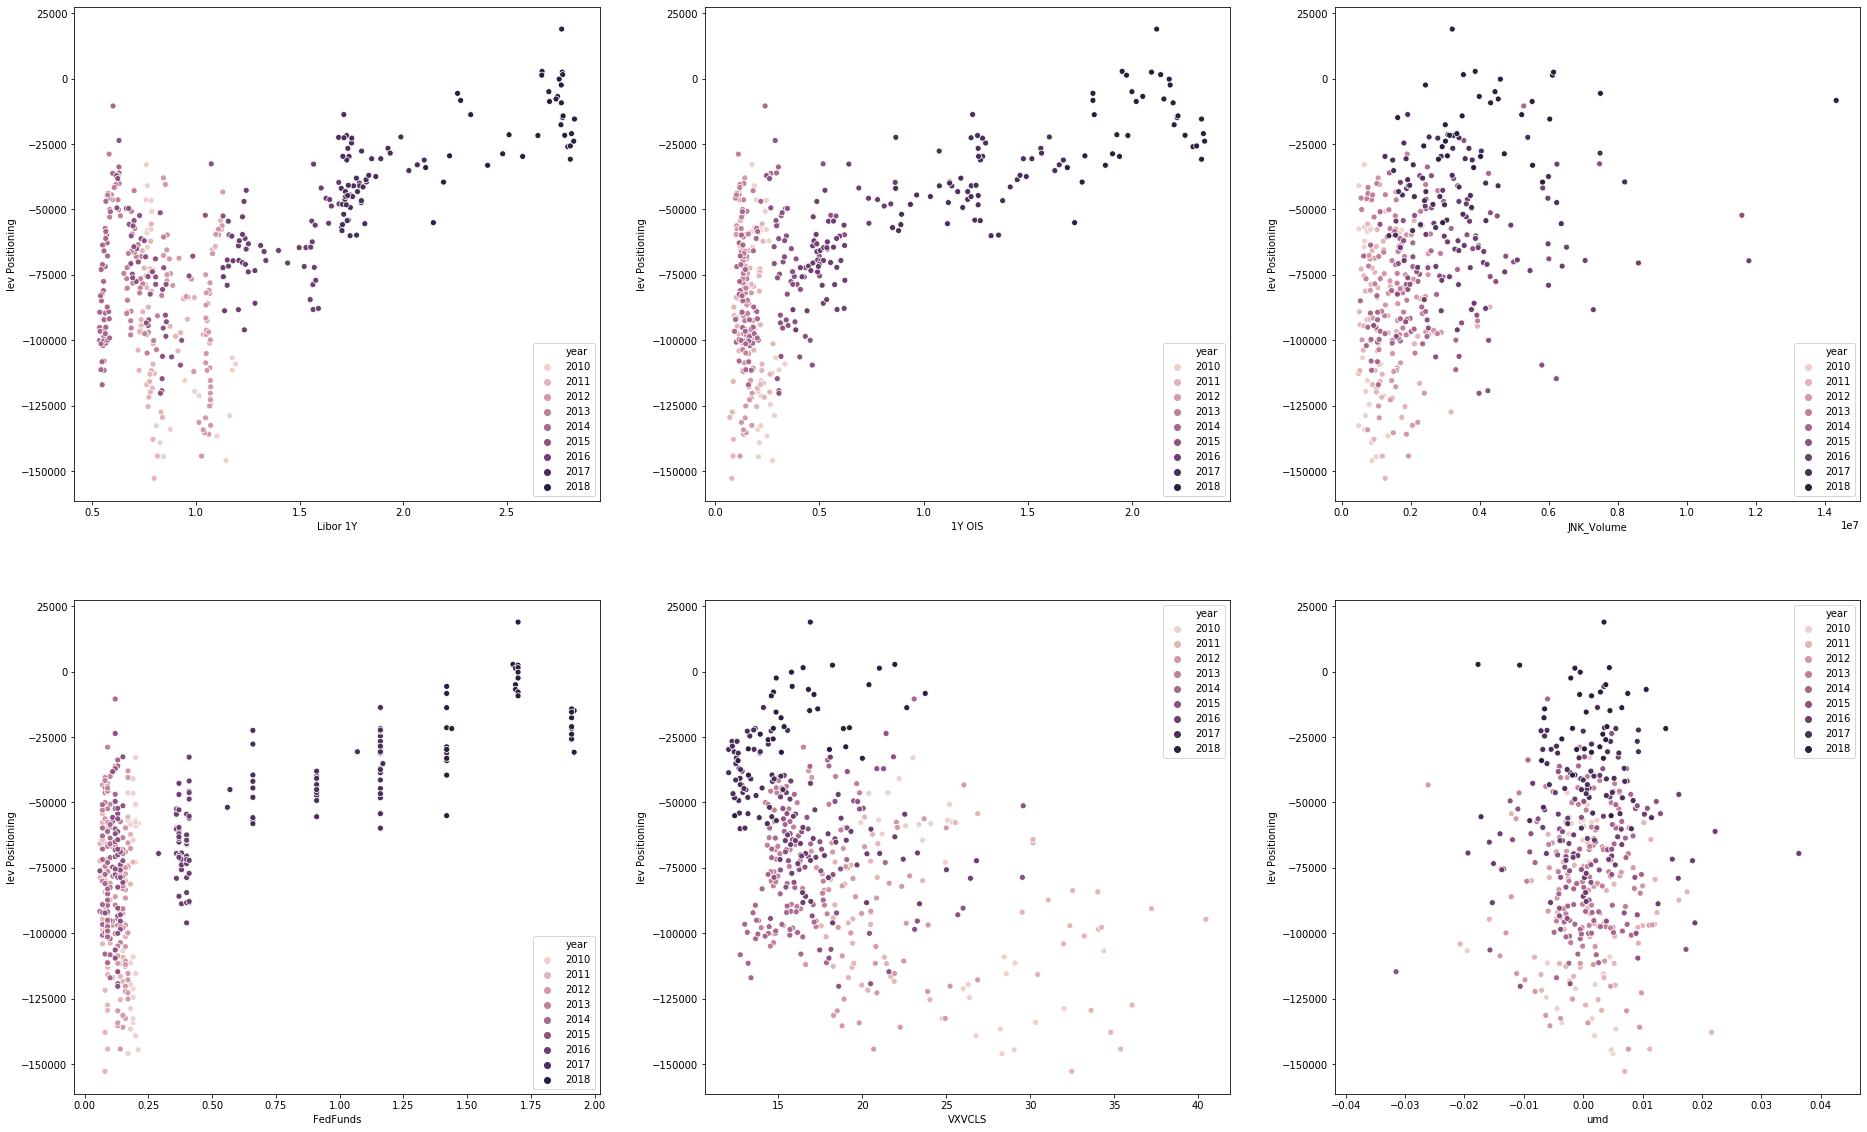

In [60]:
fig = plt.figure(figsize = (32,20))
axs = fig.subplots(2,3)
for i in range(6):
    sns.scatterplot(study_data_left.iloc[:,3+i], study_data_left.iloc[:,2], data=study_data_left, hue="year",legend="full", ax=axs[i//3,i%3])
    axs[i//3, i%3].set_ylabel(study_data_left.columns[2])
    axs[i//3, i%3].set_xlabel(study_data_left.columns[i+3])
    #print(selected[i+2], "is Ok!")

### Weekly Plots

In [39]:
K = 5

In [40]:
selected #SPX, JNK_Price, JNK_Volume, Gold_price

['Positioning',
 'lev Positioning',
 'SPX',
 'Libor 1Y',
 '1Y OIS',
 'JNK_Price',
 'JNK_Volume',
 'FedFunds',
 'VXVCLS',
 'GOLD_price',
 'umd',
 'Libor 3 mo',
 'Libor 6 mo',
 'T10Y3M',
 'T10Y2Y']

In [41]:
study_data['SPXWeeklyRet'] = study_data['SPX'].rolling(K, min_periods=1).sum()
study_data['JNKWeeklyRet'] = study_data['JNK_Price'].rolling(K, min_periods=1).sum()
study_data['GoldWeeklyRet'] = study_data['GOLD_price'].rolling(K, min_periods=1).sum()
study_data['JNKWeeklyVolume'] = study_data['JNK_Volume'].rolling(K, min_periods=1).sum()

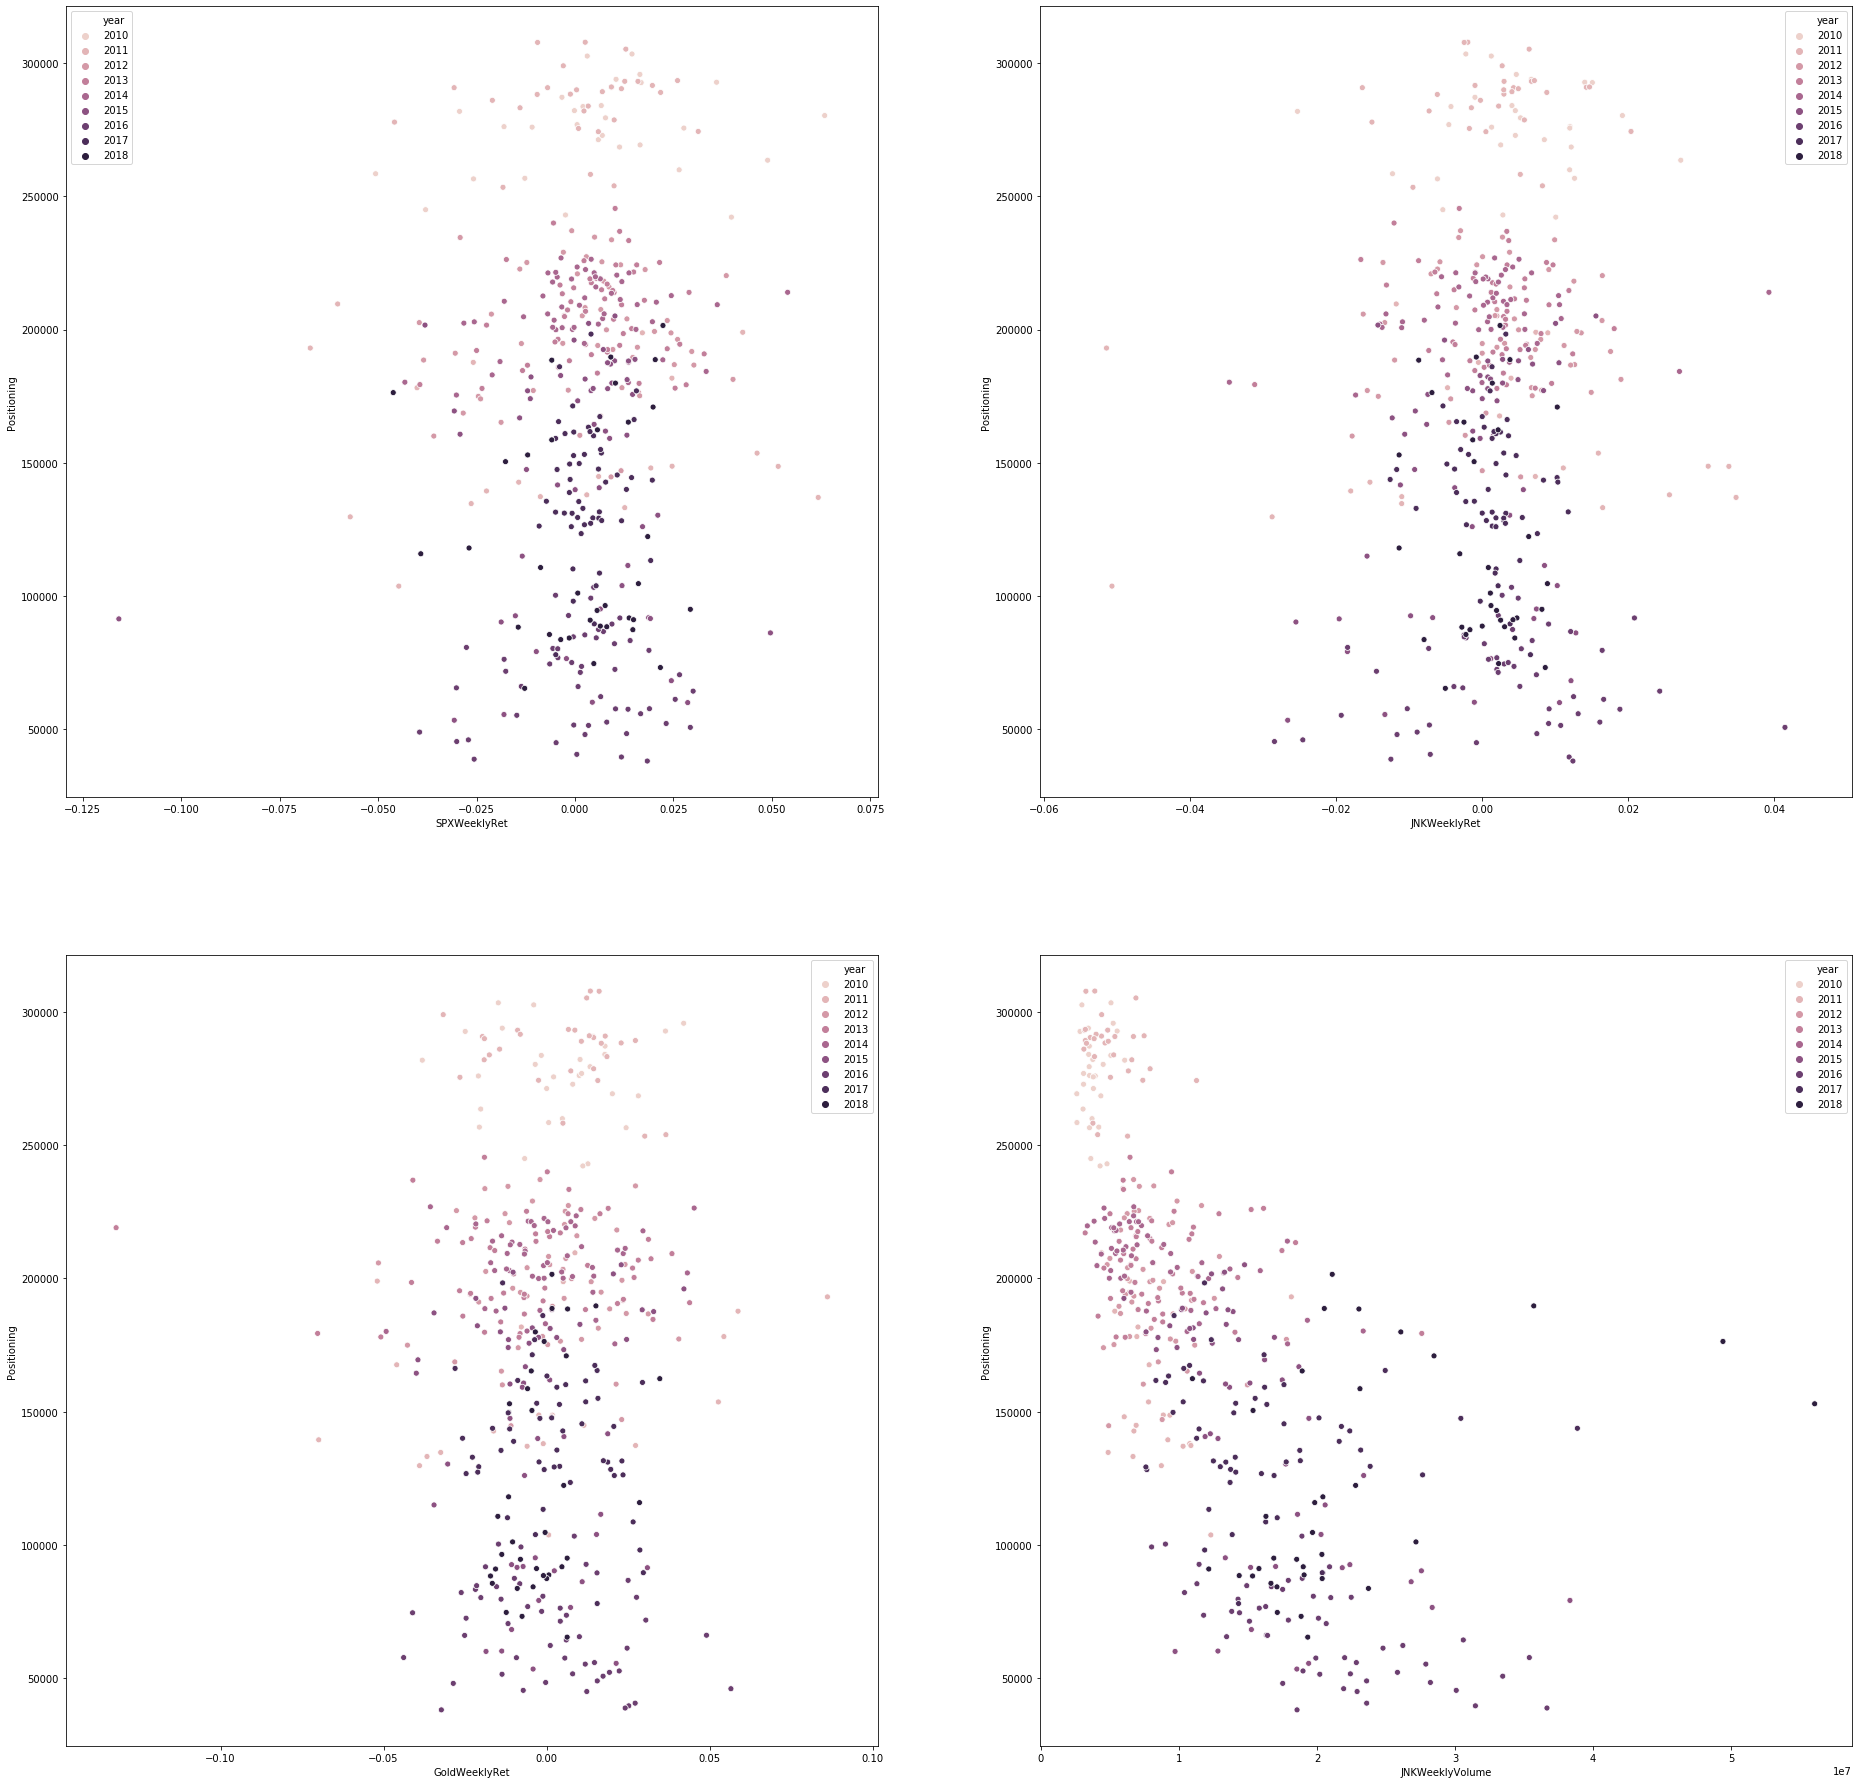

In [61]:
fig = plt.figure(figsize = (32,32))
axs = fig.subplots(2,2)
for i in range(4):
    sns.scatterplot(study_data.iloc[:,17+i], study_data.iloc[:,1], data=study_data, hue="year",legend="full", ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel(study_data.columns[1])
    axs[i//2, i%2].set_xlabel(study_data.columns[i+17])

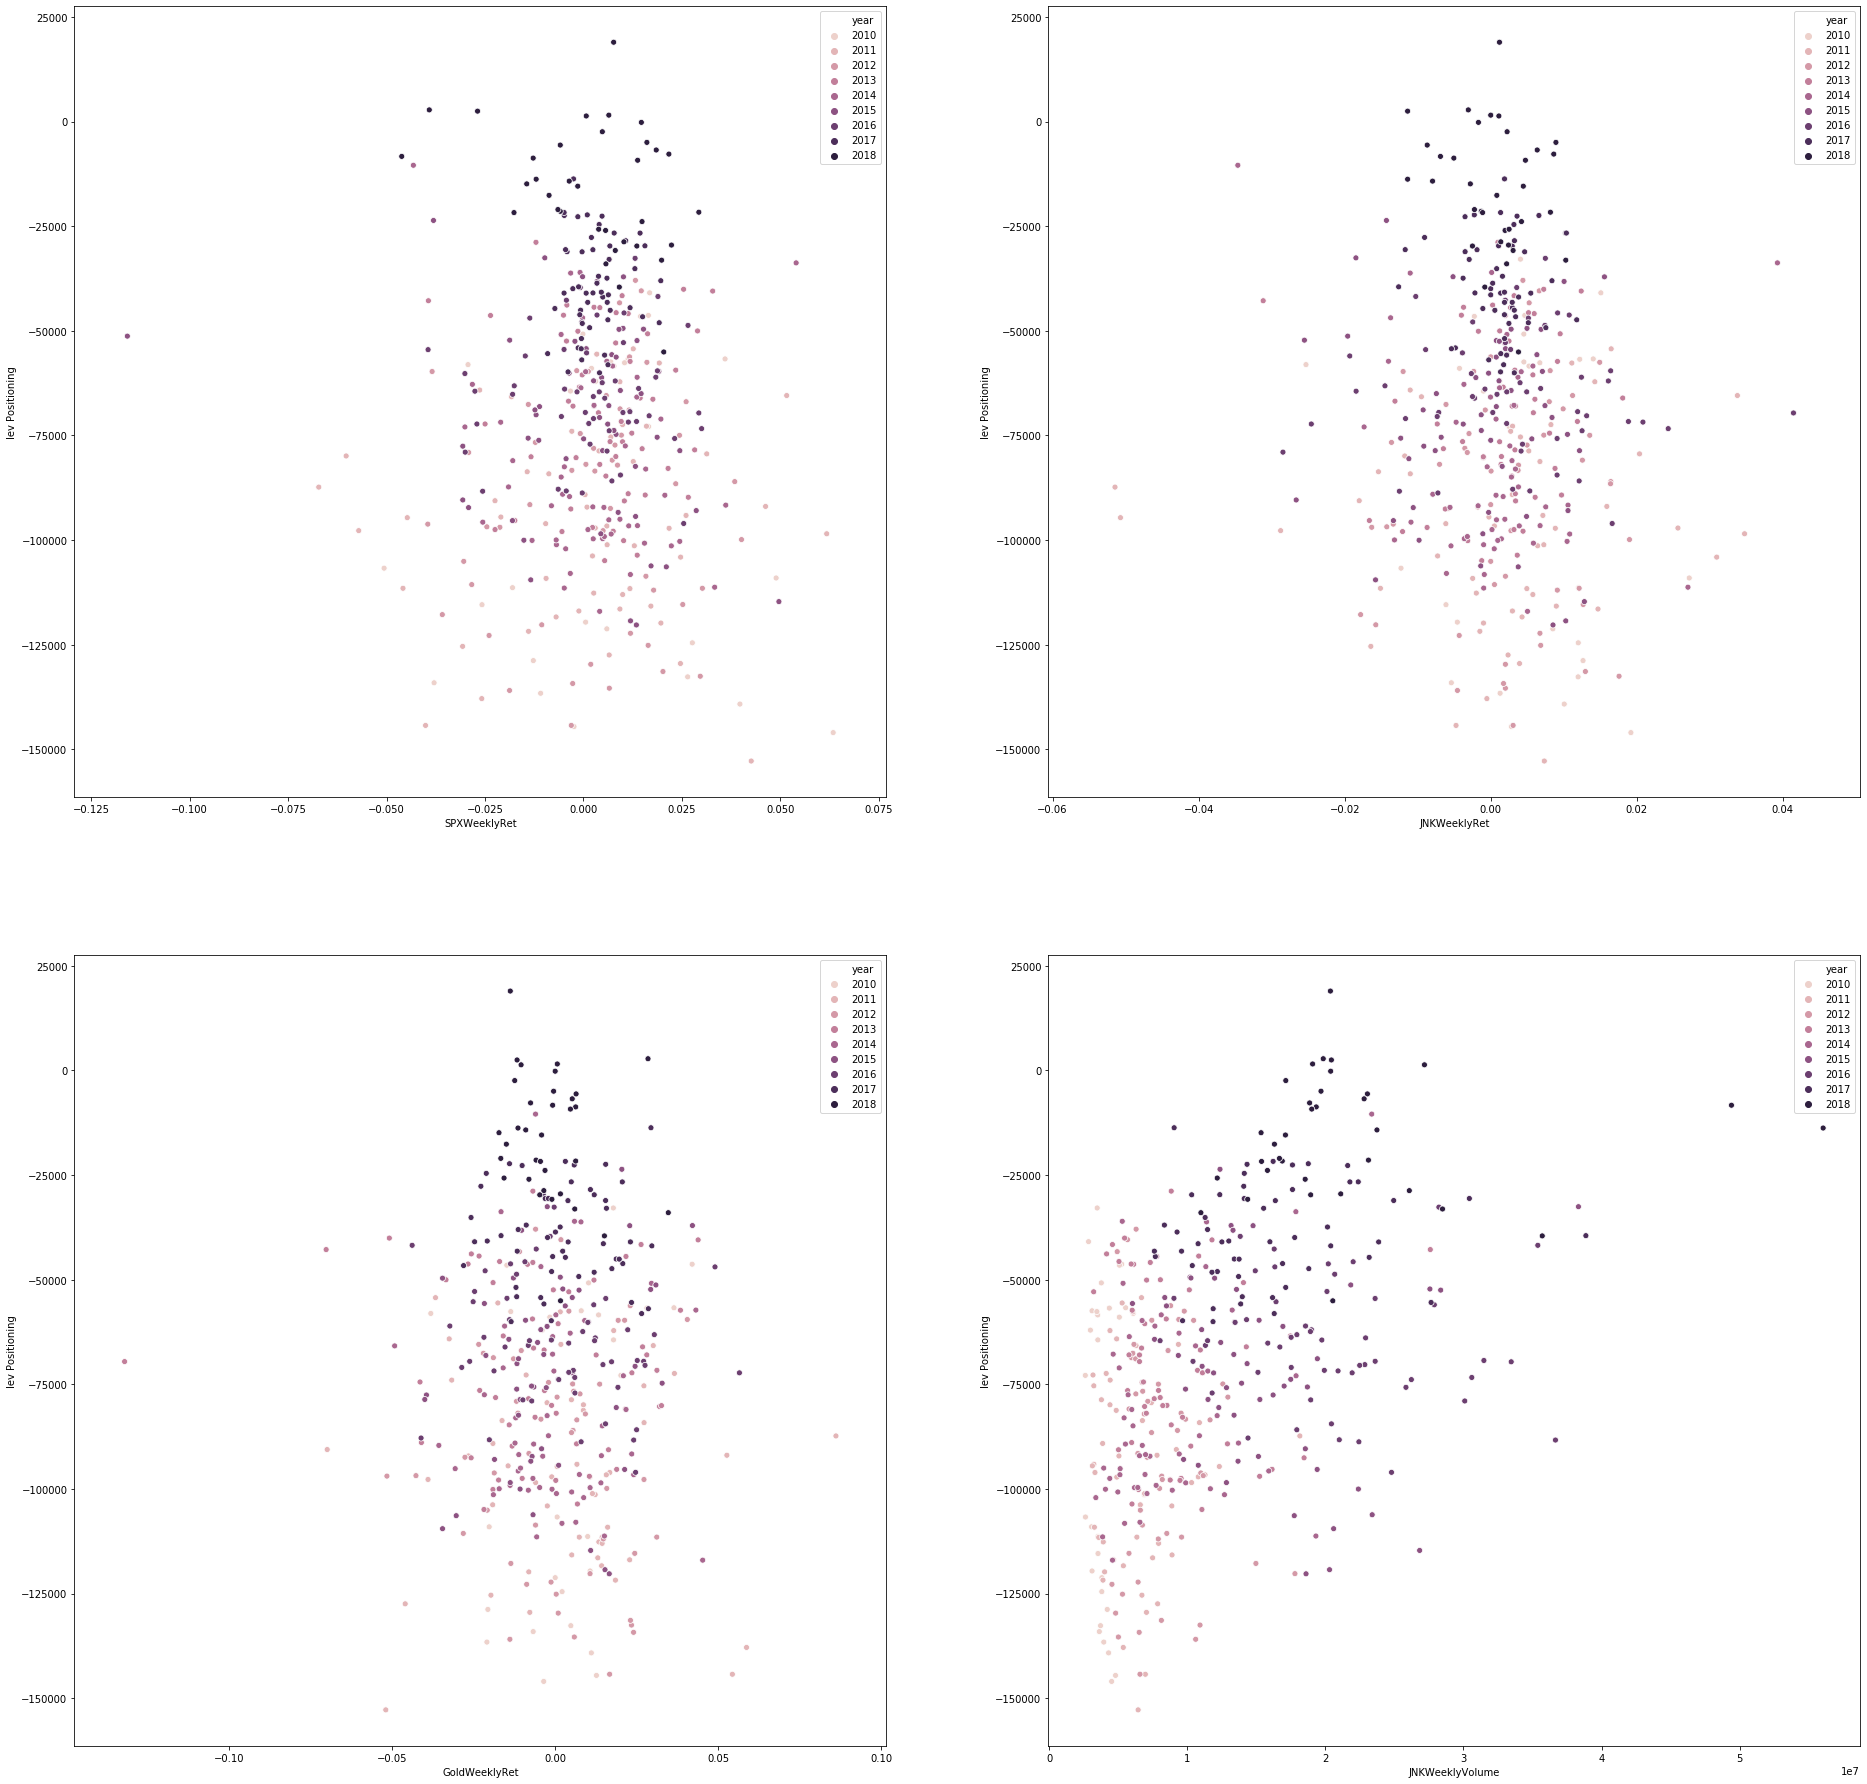

In [62]:
fig = plt.figure(figsize = (32,32))
axs = fig.subplots(2,2)
for i in range(4):
    sns.scatterplot(study_data.iloc[:,17+i], study_data.iloc[:,2], data=study_data, hue="year", legend="full",ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel(study_data.columns[2])
    axs[i//2, i%2].set_xlabel(study_data.columns[i+17])

### Monthly Plots

In [44]:
K = 22

In [45]:
study_data['SPXMonthlyRet'] = study_data['SPX'].rolling(K, min_periods=1).sum()
study_data['JNKMonthlyRet'] = study_data['JNK_Price'].rolling(K, min_periods=1).sum()
study_data['GoldMonthlyRet'] = study_data['GOLD_price'].rolling(K, min_periods=1).sum()
study_data['JNKMonthlyVolume'] = study_data['JNK_Volume'].rolling(K, min_periods=1).sum()

In [46]:
study_data.columns

Index(['Time', 'Positioning', 'lev Positioning', 'SPX', 'Libor 1Y', '1Y OIS',
       'JNK_Price', 'JNK_Volume', 'FedFunds', 'VXVCLS', 'GOLD_price', 'umd',
       'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y', 'year', 'SPXWeeklyRet',
       'JNKWeeklyRet', 'GoldWeeklyRet', 'JNKWeeklyVolume', 'SPXMonthlyRet',
       'JNKMonthlyRet', 'GoldMonthlyRet', 'JNKMonthlyVolume'],
      dtype='object')

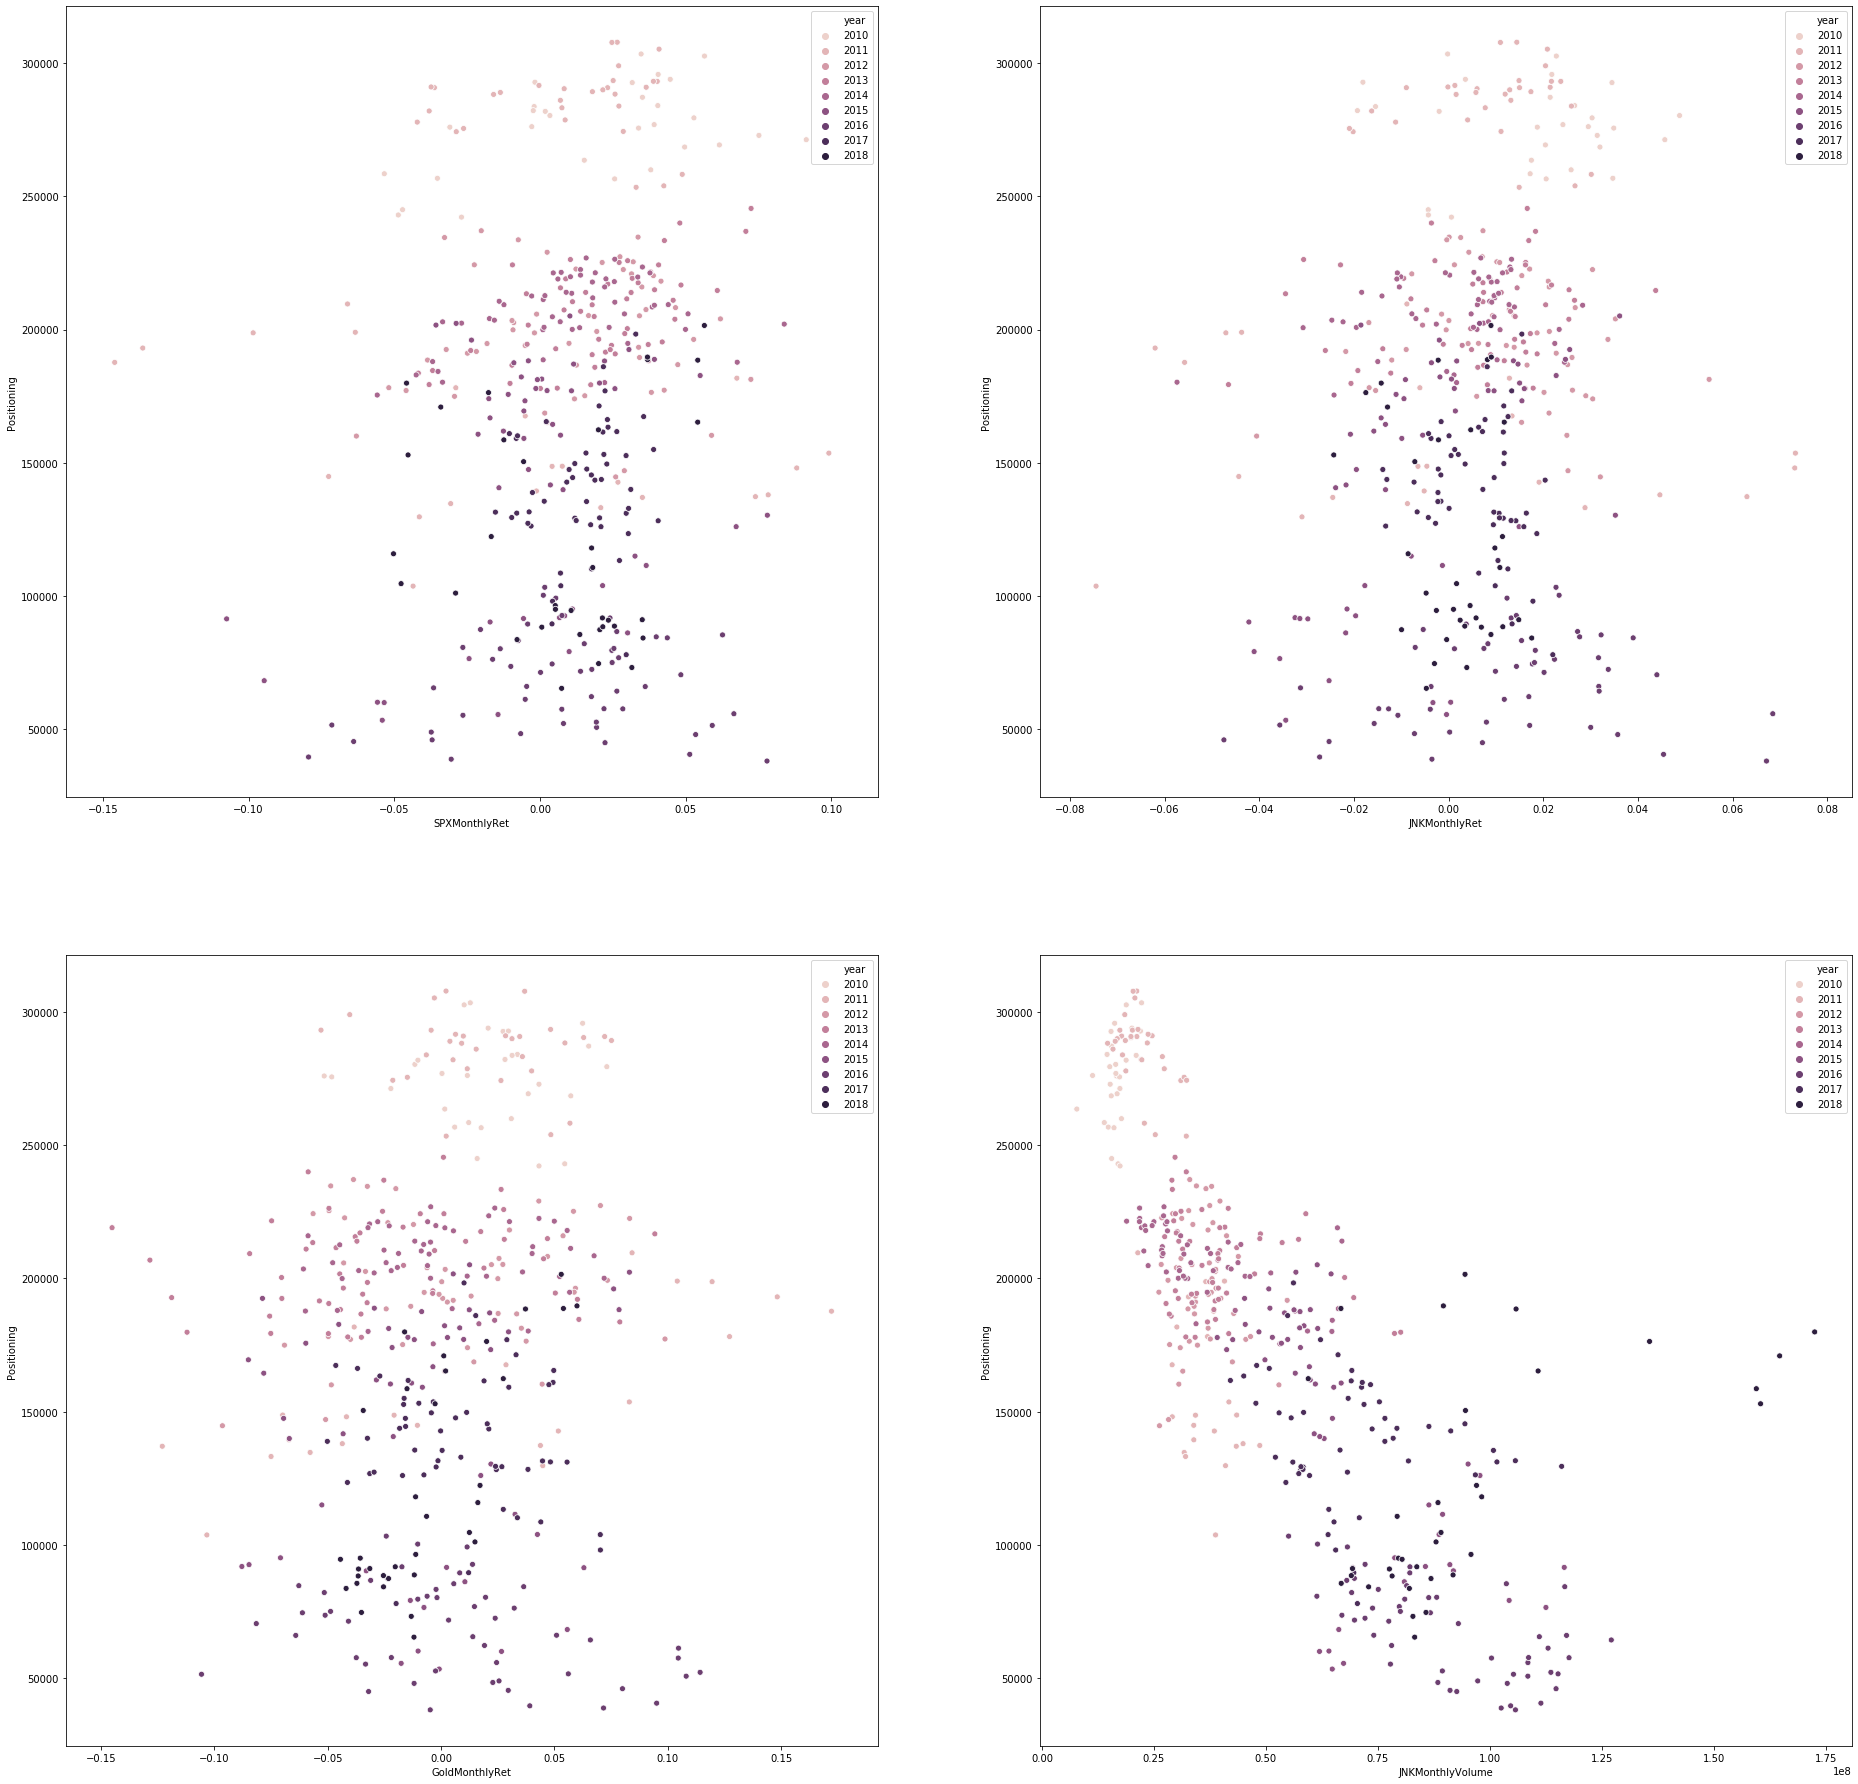

In [63]:
fig = plt.figure(figsize = (32,32))
axs = fig.subplots(2,2)
for i in range(4):
    sns.scatterplot(study_data.iloc[:,21+i], study_data.iloc[:,1], data=study_data, hue="year",legend="full", ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel(study_data.columns[1])
    axs[i//2, i%2].set_xlabel(study_data.columns[21+i])

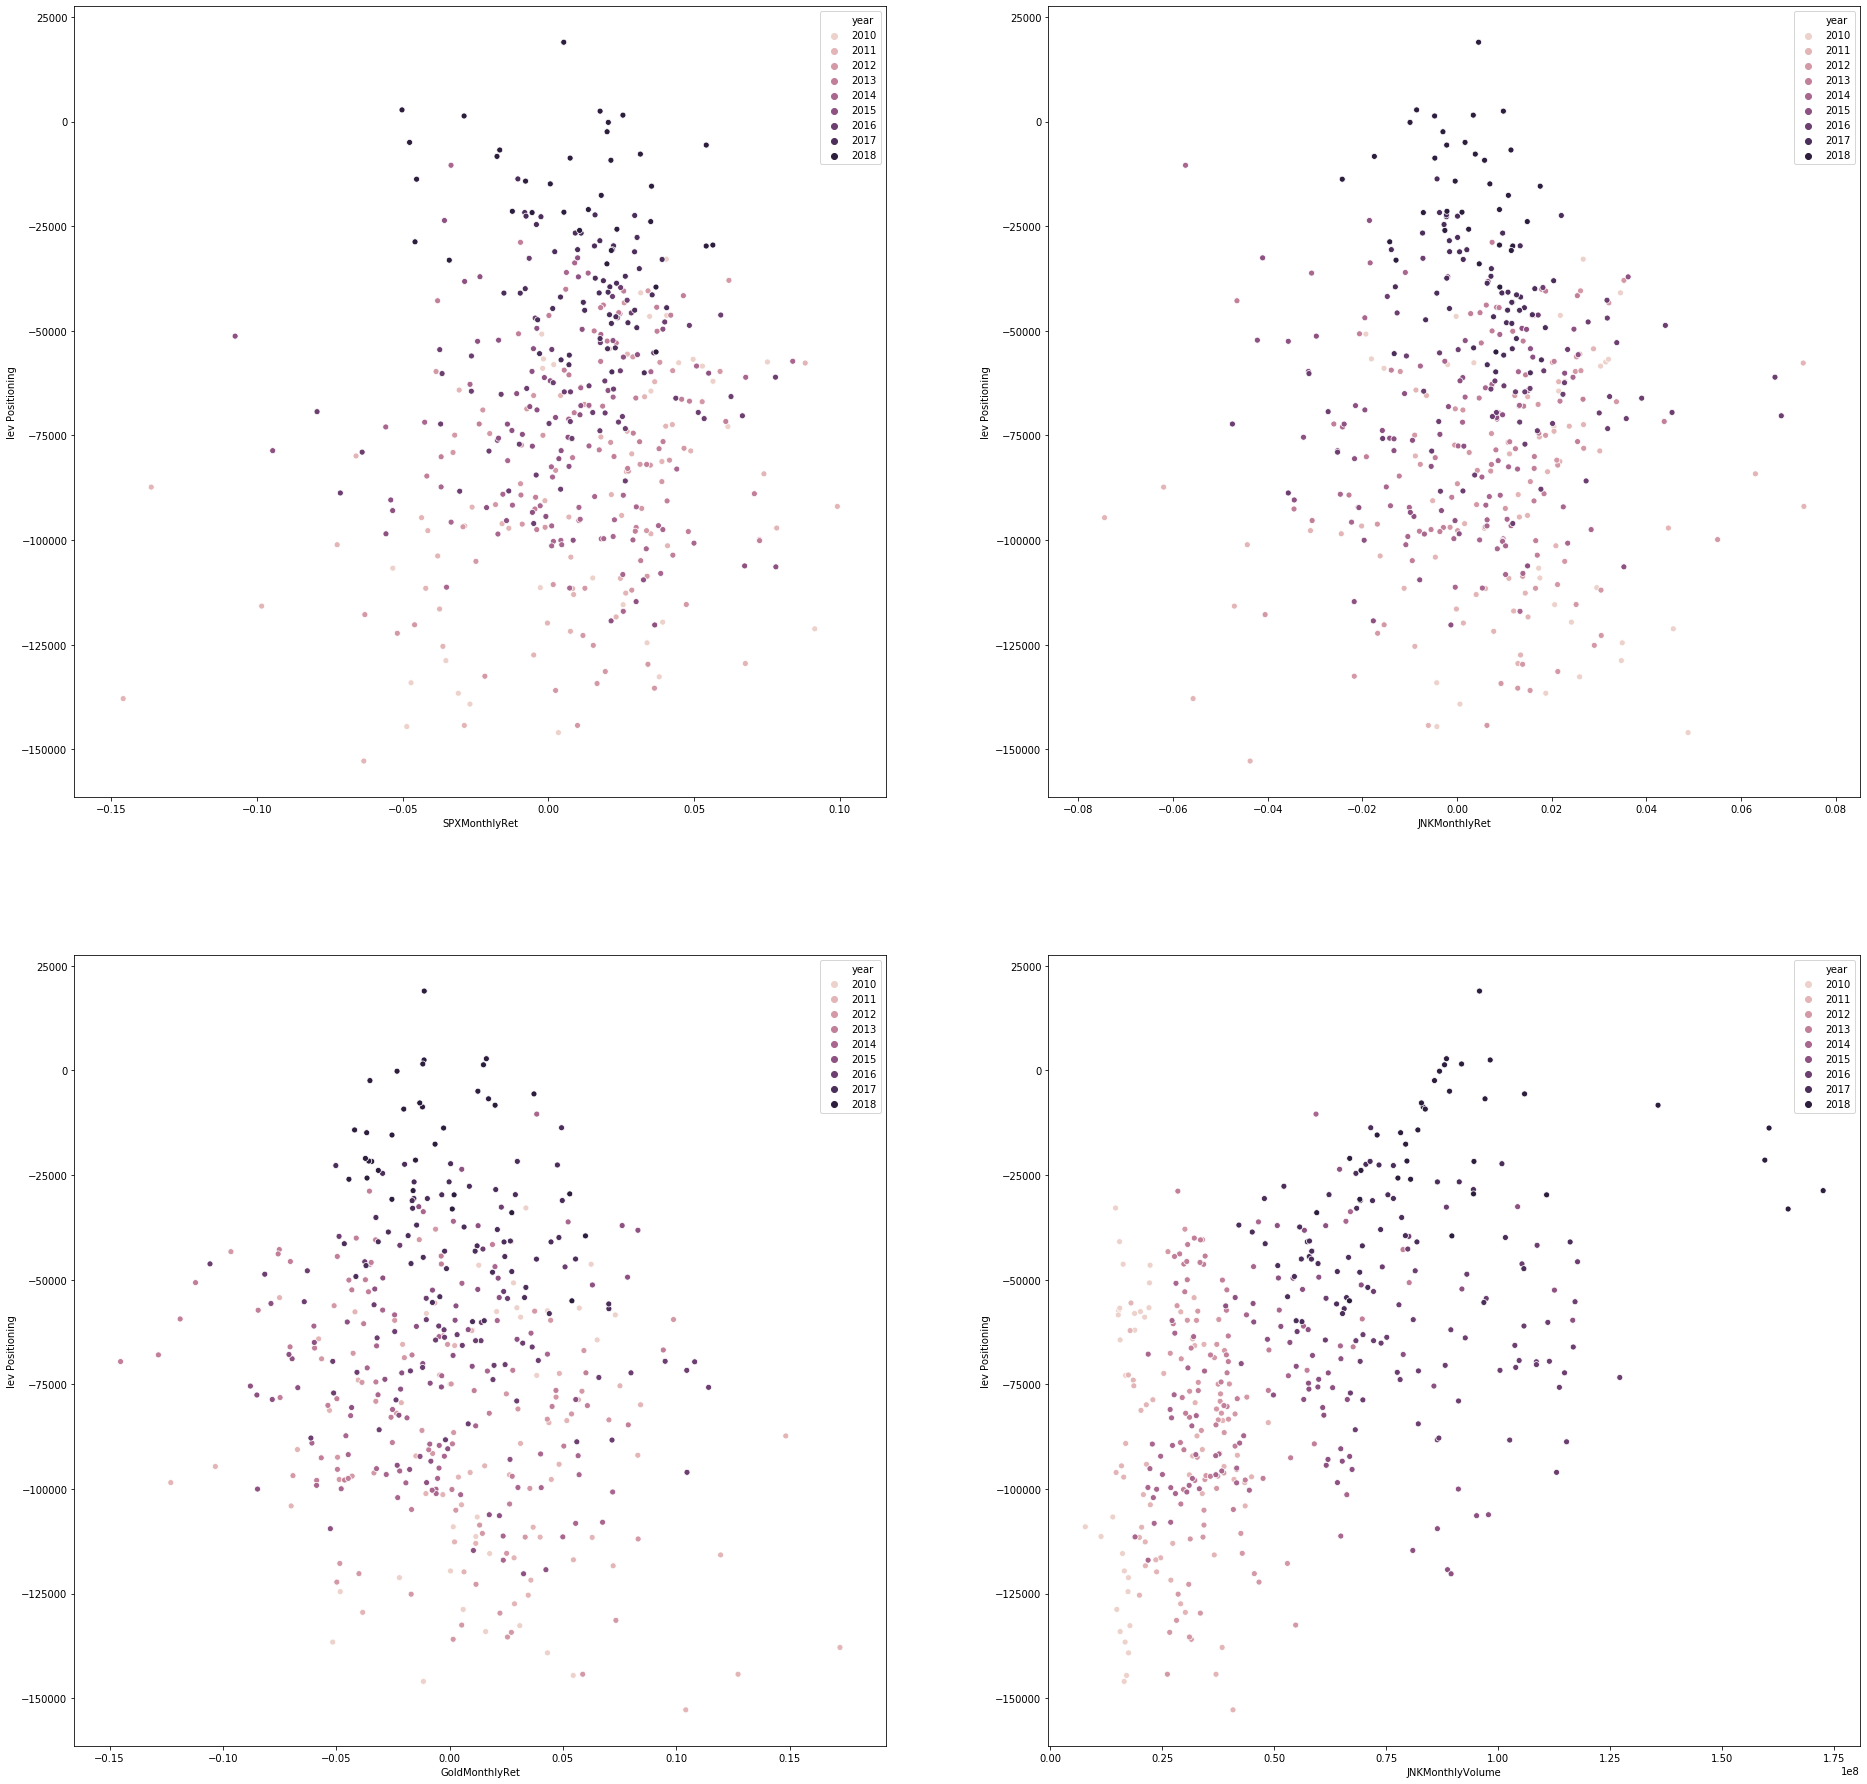

In [64]:
fig = plt.figure(figsize = (32,32))
axs = fig.subplots(2,2)
for i in range(4):
    sns.scatterplot(study_data.iloc[:,21+i], study_data.iloc[:,2], data=study_data, hue="year", legend="full",ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel(study_data.columns[2])
    axs[i//2, i%2].set_xlabel(study_data.columns[21+i])

### More Study on Rates

In [49]:
study_data.columns

Index(['Time', 'Positioning', 'lev Positioning', 'SPX', 'Libor 1Y', '1Y OIS',
       'JNK_Price', 'JNK_Volume', 'FedFunds', 'VXVCLS', 'GOLD_price', 'umd',
       'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y', 'year', 'SPXWeeklyRet',
       'JNKWeeklyRet', 'GoldWeeklyRet', 'JNKWeeklyVolume', 'SPXMonthlyRet',
       'JNKMonthlyRet', 'GoldMonthlyRet', 'JNKMonthlyVolume'],
      dtype='object')

In [50]:
rates = study_data.loc[:,['Time','Positioning', 'lev Positioning', 'FedFunds', 'Libor 1Y', '1Y OIS','Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y','year']]

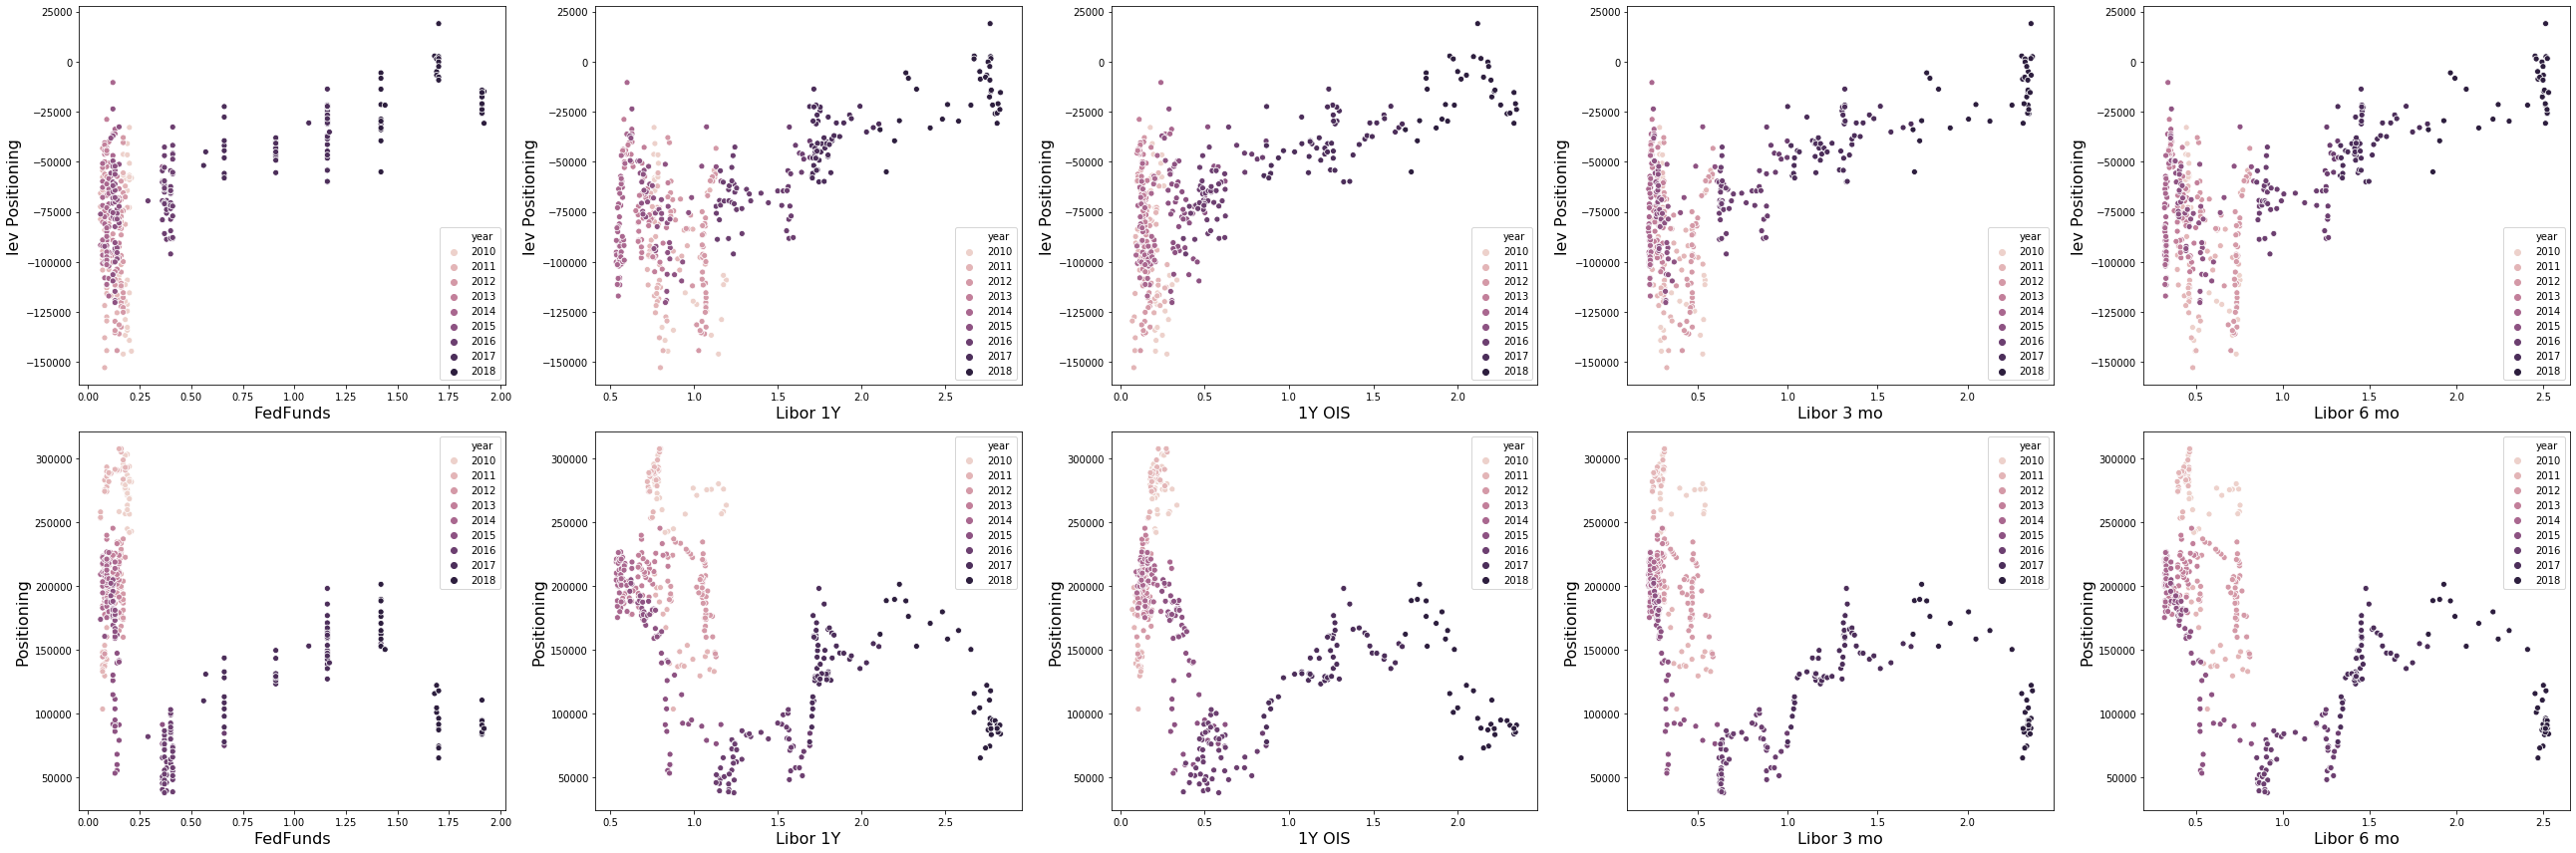

In [65]:
fig = plt.figure(figsize = [36,12])
axs = fig.subplots(2,5)
for i in range(5):
    sns.scatterplot(rates.iloc[:,3+i], study_data.iloc[:,2], data=rates, hue="year", legend="full",ax=axs[0,i])
    axs[0,i].set_ylabel(rates.columns[2], size = 16)
    axs[0,i].set_xlabel(rates.columns[3+i], size = 16)
for i in range(5):
    sns.scatterplot(rates.iloc[:,3+i], study_data.iloc[:,1], data=rates, hue="year",legend="full", ax=axs[1,i])
    axs[1,i].set_ylabel(rates.columns[1], size = 16)
    axs[1,i].set_xlabel(rates.columns[3+i], size = 16)
plt.tight_layout()

#### Spreads

In [52]:
rates['stress'] = rates['Libor 1Y'] - rates['1Y OIS']

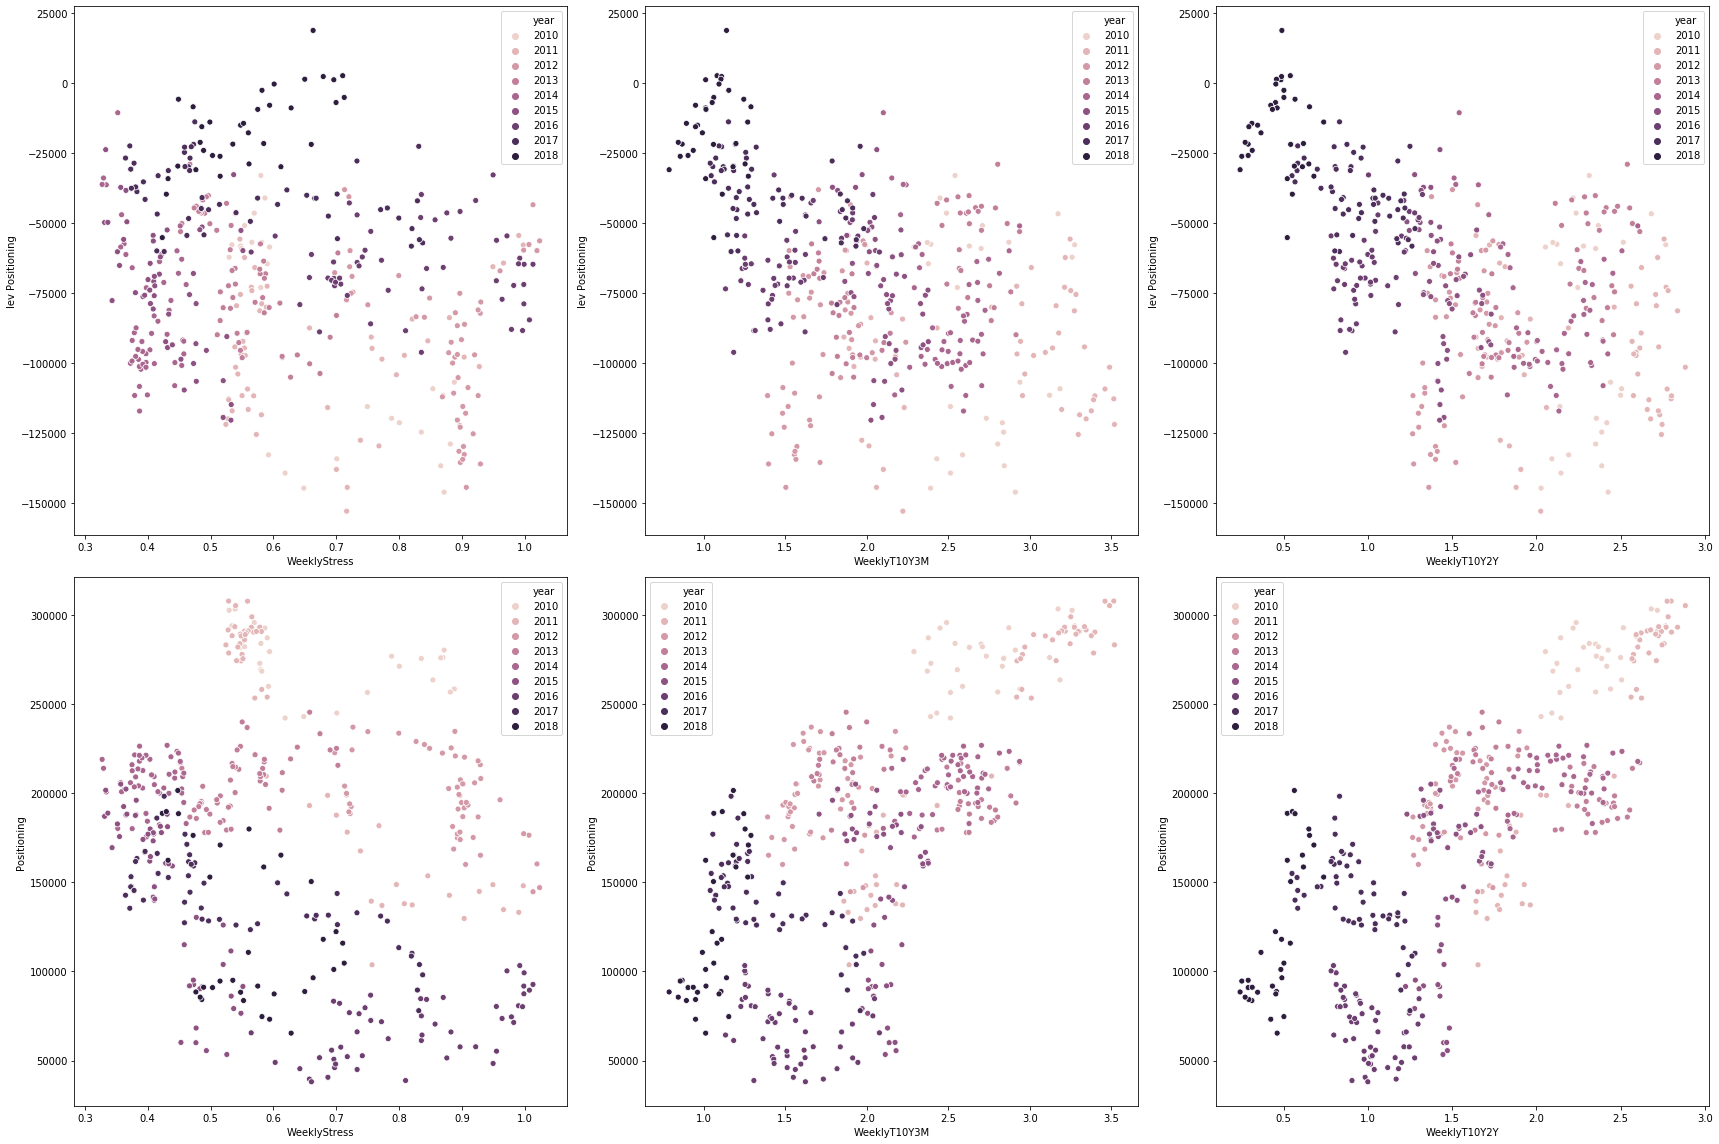

In [66]:
fig = plt.figure(figsize = [24,16])
axs = fig.subplots(2,3)
for i in range(1,4):
    sns.scatterplot(rates.iloc[:,-i], rates.iloc[:,2], data=rates, hue="year", legend="full", ax=axs[0,i-1])
    axs[0,i-1].set_ylabel(rates.columns[2])
    axs[0,i-1].set_xlabel(rates.columns[-i])
for i in range(1,4):
    sns.scatterplot(rates.iloc[:,-i], rates.iloc[:,1], data=rates, hue="year", legend="full",ax=axs[1,i-1])
    axs[1,i-1].set_ylabel(rates.columns[1])
    axs[1,i-1].set_xlabel(rates.columns[-i])
plt.tight_layout()

__Weekly Average__

In [54]:
K = 5
rates['WeeklyT10Y2Y'] = rates['T10Y2Y'].rolling(K, min_periods=1).mean()
rates['WeeklyT10Y3M'] = rates['T10Y3M'].rolling(K, min_periods=1).mean()
rates['WeeklyStress'] = rates['stress'].rolling(K, min_periods=1).mean()

In [55]:
rates.columns

Index(['Time', 'Positioning', 'lev Positioning', 'FedFunds', 'Libor 1Y',
       '1Y OIS', 'Libor 3 mo', 'Libor 6 mo', 'T10Y3M', 'T10Y2Y', 'year',
       'stress', 'WeeklyT10Y2Y', 'WeeklyT10Y3M', 'WeeklyStress'],
      dtype='object')

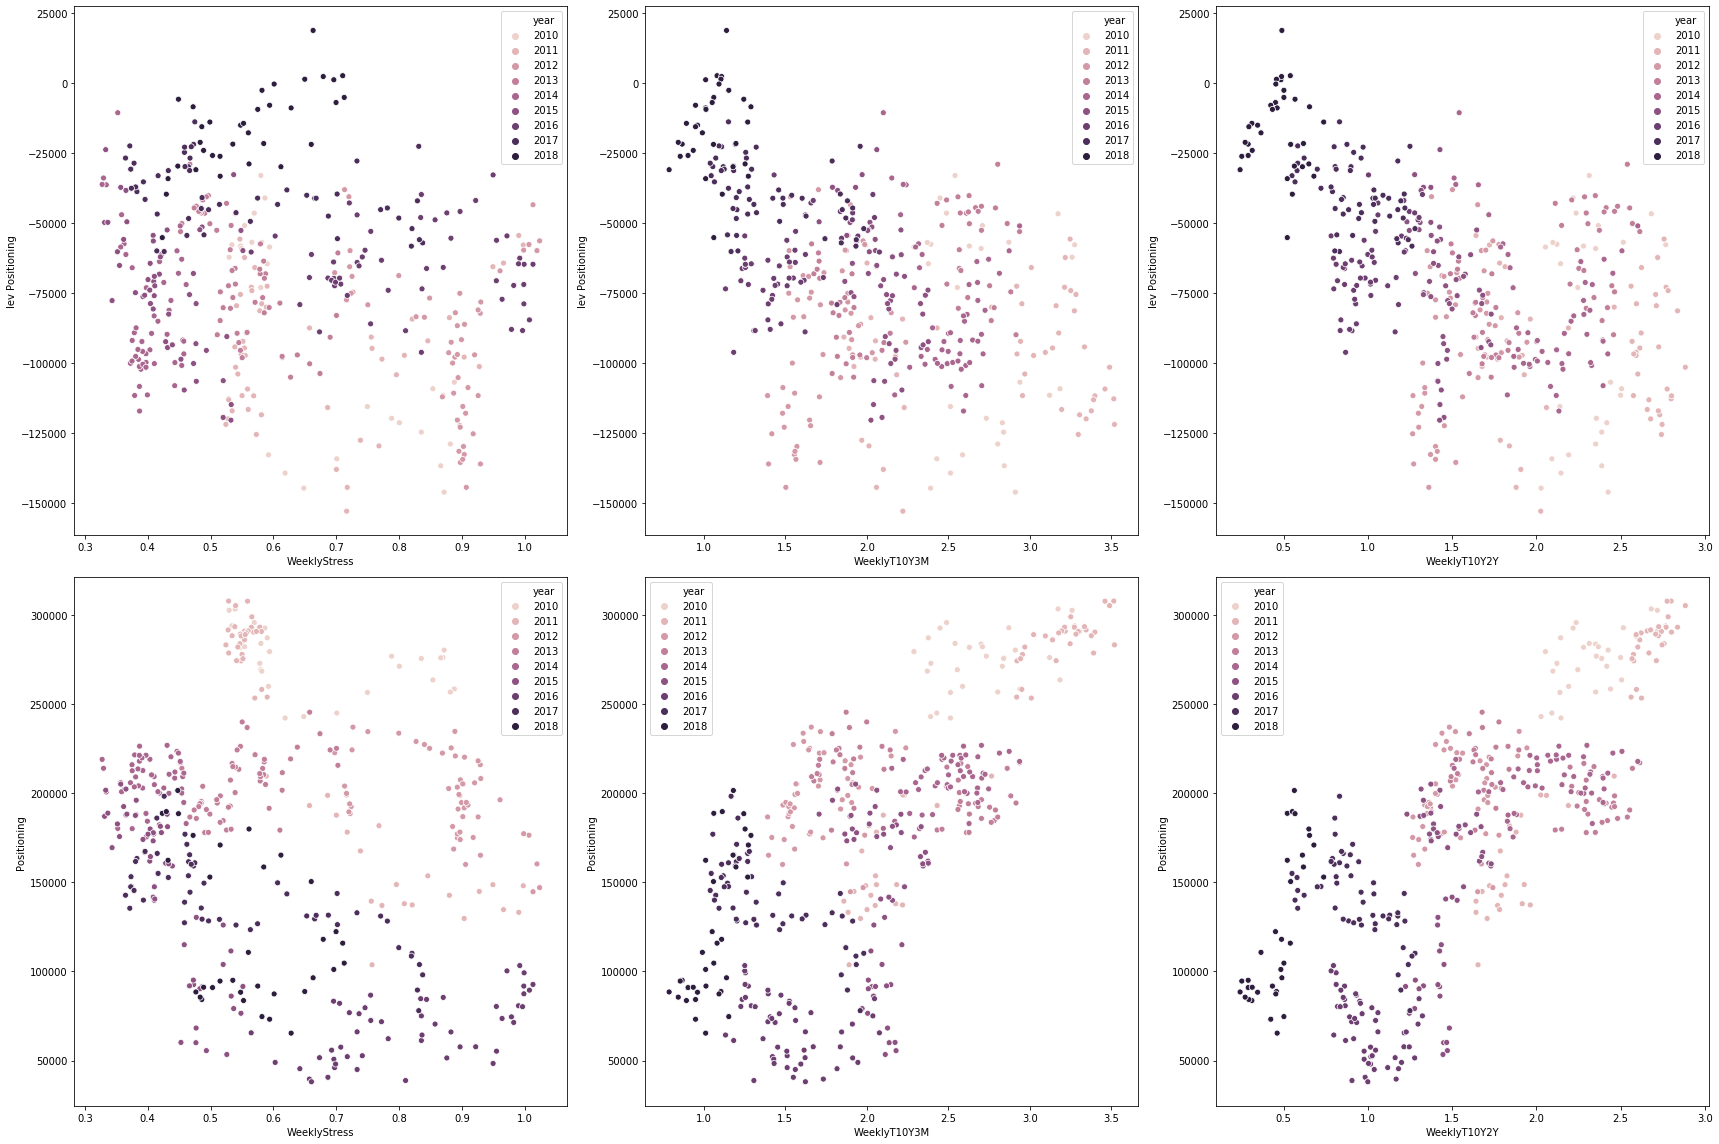

In [67]:
fig = plt.figure(figsize = [24,16])
axs = fig.subplots(2,3)
for i in range(1,4):
    sns.scatterplot(rates.iloc[:,-i], rates.iloc[:,2], data=rates, hue="year", legend="full",ax=axs[0,i-1])
    axs[0,i-1].set_ylabel(rates.columns[2])
    axs[0,i-1].set_xlabel(rates.columns[-i])
for i in range(1,4):
    sns.scatterplot(rates.iloc[:,-i], rates.iloc[:,1], data=rates, hue="year", legend="full",ax=axs[1,i-1])
    axs[1,i-1].set_ylabel(rates.columns[1])
    axs[1,i-1].set_xlabel(rates.columns[-i])
plt.tight_layout()